# Cerebellar volumetry and cortical thickness covariance 
## Data: 
    - 1. Freesurfer cortical thickness measures in Des/DKT atlas;
    - 2. Cerebellar lobular volumnes from SUIT/MDTB/MAGeT softwares; 
## Atlases
    -1. Des 2009a: L+R: 74 regions + WhiteSurfArea_area + MeanThickness_thickness
    -2. DKT:       L+R: 31 regions + WhiteSurfArea_area + MeanThickness_thickness
## Cohorts
- The augmented cohort 211: MNI ET/ matched NC (34/177).

## Tasks: exploring the structural covariance with cerebellar/lolbular volumes 
    - 1. ??
    - 2. ??
## recommendations from literature
    - use cortical volumne/surface areas
Ref: 
1. [Reliability and comparability of human brain structural covariance networks](https://www.sciencedirect.com/science/article/pii/S1053811920305905?via%3Dihub)
2. [Freesurfer cortical thickness calculation](https://surfer.nmr.mgh.harvard.edu/fswiki/VolumeRoiCorticalThickness)
3. 

In [1]:
#reading/merging/selecting data
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('/codes')

data_dir = Path("/codes/tab_data")
# data files
matched_des_all_file = data_dir/ 'matched_Des-all_qced.csv'
matched_DKT_all_file = data_dir/ 'matched_DKT-all_qced.csv'
data_df = pd.read_csv(matched_DKT_all_file , sep=',', header=0, index_col=0);

In [2]:
# preproc ROI list for analysis
# cerebellum ROIs
SUIT_l_labels_ = ['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 
                 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 
                 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels_ = ['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII',
                 'Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X',
                 'Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels = ['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 
                 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];
MAGeT_l_labels = ['L_I_IV',  'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 
                 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X'];  # NO  'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'
MAGeT_r_labels = ['R_I_IV','R_V','R_VI','R_Crus_I','R_Crus_II',
                 'R_VIIB','R_VIIIA','R_VIIIB','R_IX','R_X'];  # NO  'Right_Dentate','Right_Interposed','Right_Fastigial'
length_lobule_list=len(MAGeT_l_labels)
SUIT_l_labels = SUIT_l_labels_[:length_lobule_list];
SUIT_r_labels = SUIT_r_labels_[:length_lobule_list];
cerebellum_list = ['Left_Cerebellum_White_Matter','Left_Cerebellum_Cortex','Right_Cerebellum_White_Matter','Right_Cerebellum_Cortex'];

# Freesurfer 'Destrieux' 2009a atlas, and DKT atlas ROIs:
Des_atlas_str="lh_G&S_frontomargin_thickness	lh_G&S_occipital_inf_thickness	lh_G&S_paracentral_thickness	lh_G&S_subcentral_thickness	lh_G&S_transv_frontopol_thickness	lh_G&S_cingul-Ant_thickness	lh_G&S_cingul-Mid-Ant_thickness	lh_G&S_cingul-Mid-Post_thickness	lh_G_cingul-Post-dorsal_thickness	lh_G_cingul-Post-ventral_thickness	lh_G_cuneus_thickness	lh_G_front_inf-Opercular_thickness	lh_G_front_inf-Orbital_thickness	lh_G_front_inf-Triangul_thickness	lh_G_front_middle_thickness	lh_G_front_sup_thickness	lh_G_Ins_lg&S_cent_ins_thickness	lh_G_insular_short_thickness	lh_G_occipital_middle_thickness	lh_G_occipital_sup_thickness	lh_G_oc-temp_lat-fusifor_thickness	lh_G_oc-temp_med-Lingual_thickness	lh_G_oc-temp_med-Parahip_thickness	lh_G_orbital_thickness	lh_G_pariet_inf-Angular_thickness	lh_G_pariet_inf-Supramar_thickness	lh_G_parietal_sup_thickness	lh_G_postcentral_thickness	lh_G_precentral_thickness	lh_G_precuneus_thickness	lh_G_rectus_thickness	lh_G_subcallosal_thickness	lh_G_temp_sup-G_T_transv_thickness	lh_G_temp_sup-Lateral_thickness	lh_G_temp_sup-Plan_polar_thickness	lh_G_temp_sup-Plan_tempo_thickness	lh_G_temporal_inf_thickness	lh_G_temporal_middle_thickness	lh_Lat_Fis-ant-Horizont_thickness	lh_Lat_Fis-ant-Vertical_thickness	lh_Lat_Fis-post_thickness	lh_Pole_occipital_thickness	lh_Pole_temporal_thickness	lh_S_calcarine_thickness	lh_S_central_thickness	lh_S_cingul-Marginalis_thickness	lh_S_circular_insula_ant_thickness	lh_S_circular_insula_inf_thickness	lh_S_circular_insula_sup_thickness	lh_S_collat_transv_ant_thickness	lh_S_collat_transv_post_thickness	lh_S_front_inf_thickness	lh_S_front_middle_thickness	lh_S_front_sup_thickness	lh_S_interm_prim-Jensen_thickness	lh_S_intrapariet&P_trans_thickness	lh_S_oc_middle&Lunatus_thickness	lh_S_oc_sup&transversal_thickness	lh_S_occipital_ant_thickness	lh_S_oc-temp_lat_thickness	lh_S_oc-temp_med&Lingual_thickness	lh_S_orbital_lateral_thickness	lh_S_orbital_med-olfact_thickness	lh_S_orbital-H_Shaped_thickness	lh_S_parieto_occipital_thickness	lh_S_pericallosal_thickness	lh_S_postcentral_thickness	lh_S_precentral-inf-part_thickness	lh_S_precentral-sup-part_thickness	lh_S_suborbital_thickness	lh_S_subparietal_thickness	lh_S_temporal_inf_thickness	lh_S_temporal_sup_thickness	lh_S_temporal_transverse_thickness"
DKT_atlas_str="lh_caudalanteriorcingulate_thickness	lh_caudalmiddlefrontal_thickness	lh_cuneus_thickness	lh_entorhinal_thickness	lh_fusiform_thickness	lh_inferiorparietal_thickness	lh_inferiortemporal_thickness	lh_isthmuscingulate_thickness	lh_lateraloccipital_thickness	lh_lateralorbitofrontal_thickness	lh_lingual_thickness	lh_medialorbitofrontal_thickness	lh_middletemporal_thickness	lh_parahippocampal_thickness	lh_paracentral_thickness	lh_parsopercularis_thickness	lh_parsorbitalis_thickness	lh_parstriangularis_thickness	lh_pericalcarine_thickness	lh_postcentral_thickness	lh_posteriorcingulate_thickness	lh_precentral_thickness	lh_precuneus_thickness	lh_rostralanteriorcingulate_thickness	lh_rostralmiddlefrontal_thickness	lh_superiorfrontal_thickness	lh_superiorparietal_thickness	lh_superiortemporal_thickness	lh_supramarginal_thickness	lh_transversetemporal_thickness	lh_insula_thickness"
Des_roi_list=[x.replace('-','_')[3:-10] for x in Des_atlas_str.split('\t')]
DKT_roi_list=[x.replace('-','_')[3:-10] for x in DKT_atlas_str.split('\t')]

def creat_Atlas_list(roi_list):
    lh_list = ['lh_'+x for x in roi_list];
    rh_list = ['rh_'+x for x in roi_list];
    # cortical thickness
    lh_cth_list = [x+'_thickness' for x in lh_list]+['lh_MeanThickness_thickness'];  
    rh_cth_list = [x+'_thickness' for x in rh_list]+['rh_MeanThickness_thickness'];  
    #
    lh_Vol_list = [x+'_volume' for x in lh_list];  
    rh_Vol_list = [x+'_volume' for x in rh_list];
    # 
    lh_area_list = [x+'_area' for x in lh_list]+['lh_WhiteSurfArea_area']; 
    rh_area_list = [x+'_area' for x in rh_list]+['rh_WhiteSurfArea_area'];
    # _meancurv
    lh_curv_list = [x+'_meancurv' for x in lh_list]; 
    rh_curv_list = [x+'_meancurv' for x in rh_list];
    res = {"l_cth":lh_cth_list,   "r_cth":rh_cth_list,
           "l_vol":lh_Vol_list,   "r_vol":rh_Vol_list,
           "l_area":lh_area_list, "r_area":rh_area_list,
           "l_curv":lh_curv_list, "r_curv":rh_curv_list,
           "l_list":lh_list,      "r_list":rh_list} 
    return res
Des_list_dict=creat_Atlas_list(Des_roi_list)
DKT_list_dict=creat_Atlas_list(DKT_roi_list)

In [3]:
# Preparing data:
from utils_.utils import ctr_tiv, glm_test, rep_model, ctr_by_nc, cal_es, creat_Bonf_df

vis_df=data_df.copy()
other_list=['eTIV', 'cerebellumVol', 'Cerebellum_Cortex', 'Cerebellum_White_Matter'];

tar_list=[];

cth_vis_df = vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_cth'] + DKT_list_dict['r_cth']].copy()
area_vis_df= vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_area']+DKT_list_dict['r_area']].copy()
vol_vis_df = vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_vol'] + DKT_list_dict['r_vol']].copy()
#curv_vis_df= vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_curv']+DKT_list_dict['r_curv']].copy()

def data_prep(df, etiv_, cort_measure):
    res_dict={}
    for cortical_m_ in cort_measure:
        info_list= ['group', etiv_];
        cov_list = ['age','male', 'is_mni','is_ppmi','is_adni']
        tar_list = ['cerebellumVol', 'Cerebellum_Cortex', 'Cerebellum_White_Matter']+DKT_list_dict['l_'+cortical_m_] + DKT_list_dict['r_'+cortical_m_];
        vis_df_   = df.loc[:, info_list+cov_list+cerebellum_list+tar_list].copy()
        offset_str=-len(etiv_+"_"+"_".join(cov_list))-1;
        res_df, res_new_col_1 = ctr_tiv(vis_df_, tar_list, etiv_, cov_list, 'rm_norm')
        res_dict[cortical_m_]={};
        res_dict[cortical_m_]['res']=res_df; 
        res_dict[cortical_m_]['new_list']=res_new_col_1;
        res_new_col  = [x[:offset_str] for x in res_new_col_1]
        print(offset_str,res_new_col)
        et_tmp = res_df[res_df['group']=='ET'].copy(); #et_tmp.loc[:]
        nc_tmp = res_df[res_df['group']=='NC'].copy()
        res_dict[cortical_m_]['ET']=et_tmp.loc[:,res_new_col];
        res_dict[cortical_m_]['NC']=nc_tmp.loc[:,res_new_col]; 
    return res_dict
    
cortical_measures=['cth', 'area', 'vol'];
res_DKT=data_prep(vis_df, 'eTIV', cortical_measures);

Using  rm_norm
New columns 67 :  ['cerebellumVol_eTIV_age_male_is_mni_is_ppmi_is_adni', 'Cerebellum_Cortex_eTIV_age_male_is_mni_is_ppmi_is_adni', 'Cerebellum_White_Matter_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_caudalanteriorcingulate_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_caudalmiddlefrontal_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_cuneus_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_entorhinal_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_fusiform_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_inferiorparietal_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_inferiortemporal_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_isthmuscingulate_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_lateraloccipital_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_lateralorbitofrontal_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_lingual_thickness_eTIV_age_male_is_mni_is_ppmi_is_adni', 'lh_medialorbitofrontal_thickness_eTIV_

Visualizing:  1_ET (34) Cortical thickness controling eTIV,age,sex,cohort
saving...


cerebellumVol  Cerebellum_Cortex  \
cerebellumVol                              1.000000           0.975984   
Cerebellum_Cortex                          0.975984           1.000000   
Cerebellum_White_Matter                    0.829594           0.688034   
lh_caudalanteriorcingulate_thickness      -0.045264          -0.032146   
lh_caudalmiddlefrontal_thickness          -0.063812          -0.148592   
...                                             ...                ...   
rh_superiortemporal_thickness             -0.038096          -0.054753   
rh_supramarginal_thickness                -0.202184          -0.215844   
rh_transversetemporal_thickness           -0.111603          -0.106125   
rh_insula_thickness                        0.016535           0.019362   
rh_MeanThickness_thickness                -0.191819          -0.214947   

                                      Cerebellum_White_Matter  \
cerebellumVol                                        0.829594   
Cerebellum_Cortex                                    0.688034   
Cerebellum_White_Matter                              1.000000   
lh_caudalanteriorcingulate_thickness                -0.068389   
lh_caudalmiddlefrontal_thickness                     0.168295   
...                                                       ...   
rh_superiortemporal_thickness                        0.013436   
rh_supramarginal_thickness                          -0.120272   
rh_transversetemporal_thickness                     -0.099756   
rh_insula_thickness                                  0.005452   
rh_MeanThickness_thickness                          -0.088044   

                                      lh_caudalanteriorcingulate_thickness  \
cerebellumVol                                                    -0.045264   
Cerebellum_Cortex                                                -0.032146   
Cerebellum_White_Matter                                          -0.068389   
lh_caudalanteriorcingulate_thickness                              1.000000   
lh_caudalmiddlefrontal_thickness                                  0.387279   
...                                                                    ...   
rh_superiortemporal_thickness                                     0.702599   
rh_supramarginal_thickness                                        0.557985   
rh_transversetemporal_thickness                                   0.457915   
rh_insula_thickness                                               0.580063   
rh_MeanThickness_thickness                                        0.536472   

                                      lh_caudalmiddlefrontal_thickness  \
cerebellumVol                                                -0.063812   
Cerebellum_Cortex                                            -0.148592   
Cerebellum_White_Matter                                       0.168295   
lh_caudalanteriorcingulate_thickness                          0.387279   
lh_caudalmiddlefrontal_thickness                              1.000000   
...                                                                ...   
rh_superiortemporal_thickness                                 0.633549   
rh_supramarginal_thickness                                    0.629359   
rh_transversetemporal_thickness                               0.594903   
rh_insula_thickness                                           0.673129   
rh_MeanThickness_thickness                                    0.802887   

                                      lh_cuneus_thickness  \
cerebellumVol                                   -0.121031   
Cerebellum_Cortex                               -0.137846   
Cerebellum_White_Matter                         -0.049855   
lh_caudalanteriorcingulate_thickness             0.480730   
lh_caudalmiddlefrontal_thickness                 0.683760   
...                                                   ...   
rh_superiortemporal_thickness                    0.572683   
rh_supramarginal_thickness                       0.701

Visualizing:  1_ET (34) Cortical area controling eTIV,age,sex,cohort
saving...


cerebellumVol  Cerebellum_Cortex  \
cerebellumVol                         1.000000           0.975984   
Cerebellum_Cortex                     0.975984           1.000000   
Cerebellum_White_Matter               0.829594           0.688034   
lh_caudalanteriorcingulate_area       0.158174           0.150245   
lh_caudalmiddlefrontal_area           0.044742           0.105876   
...                                        ...                ...   
rh_superiortemporal_area              0.323978           0.331040   
rh_supramarginal_area                 0.508988           0.504693   
rh_transversetemporal_area            0.152157           0.200645   
rh_insula_area                        0.344563           0.377086   
rh_WhiteSurfArea_area                 0.376084           0.393140   

                                 Cerebellum_White_Matter  \
cerebellumVol                                   0.829594   
Cerebellum_Cortex                               0.688034   
Cerebellum_White_Matter                         1.000000   
lh_caudalanteriorcingulate_area                 0.141809   
lh_caudalmiddlefrontal_area                    -0.122335   
...                                                  ...   
rh_superiortemporal_area                        0.230727   
rh_supramarginal_area                           0.401932   
rh_transversetemporal_area                     -0.007422   
rh_insula_area                                  0.181273   
rh_WhiteSurfArea_area                           0.245130   

                                 lh_caudalanteriorcingulate_area  \
cerebellumVol                                           0.158174   
Cerebellum_Cortex                                       0.150245   
Cerebellum_White_Matter                                 0.141809   
lh_caudalanteriorcingulate_area                         1.000000   
lh_caudalmiddlefrontal_area                             0.596033   
...                                                          ...   
rh_superiortemporal_area                                0.684924   
rh_supramarginal_area                                   0.513947   
rh_transversetemporal_area                              0.576117   
rh_insula_area                                          0.707217   
rh_WhiteSurfArea_area                                   0.787952   

                                 lh_caudalmiddlefrontal_area  lh_cuneus_area  \
cerebellumVol                                       0.044742        0.364613   
Cerebellum_Cortex                                   0.105876        0.333700   
Cerebellum_White_Matter                            -0.122335        0.359272   
lh_caudalanteriorcingulate_area                     0.596033        0.409029   
lh_caudalmiddlefrontal_area                         1.000000        0.183185   
...                                                      ...             ...   
rh_superiortemporal_area                            0.628131        0.375715   
rh_supramarginal_area                               0.536956        0.363944   
rh_transversetemporal_area                          0.569924        0.244572   
rh_insula_area                                      0.690956        0.269623   
rh_WhiteSurfArea_area                               0.610540        0.581117   

                                 lh_entorhinal_area  lh_fusiform_area  \
cerebellumVol                              0.100869          0.404481   
Cerebellum_Cortex                          0.193423          0.405650   
Cerebellum_White_Matter                   -0.159761          0.307658   
lh_caudalanteriorcingulate_area            0.481400          0.647481   
lh_caudalmiddlefrontal_area                0.479210          0.407357   
...                                             ...               ...   
rh_superiortemporal_area                   0.380396          0.656691   
rh_supramarginal_area                      0.522736          0.418843   
rh_transversetemporal_area                 0.604

Visualizing:  1_ET (34) Cortical volume controling eTIV,age,sex,cohort
saving...


cerebellumVol  Cerebellum_Cortex  \
cerebellumVol                           1.000000           0.975984   
Cerebellum_Cortex                       0.975984           1.000000   
Cerebellum_White_Matter                 0.829594           0.688034   
lh_caudalanteriorcingulate_volume       0.103755           0.103062   
lh_caudalmiddlefrontal_volume           0.035146           0.036895   
...                                          ...                ...   
rh_superiorparietal_volume              0.027519          -0.000199   
rh_superiortemporal_volume              0.247213           0.247321   
rh_supramarginal_volume                 0.300533           0.279960   
rh_transversetemporal_volume            0.059997           0.081894   
rh_insula_volume                        0.334265           0.368271   

                                   Cerebellum_White_Matter  \
cerebellumVol                                     0.829594   
Cerebellum_Cortex                                 0.688034   
Cerebellum_White_Matter                           1.000000   
lh_caudalanteriorcingulate_volume                 0.081462   
lh_caudalmiddlefrontal_volume                     0.022510   
...                                                    ...   
rh_superiorparietal_volume                        0.092184   
rh_superiortemporal_volume                        0.189591   
rh_supramarginal_volume                           0.283552   
rh_transversetemporal_volume                     -0.010045   
rh_insula_volume                                  0.169564   

                                   lh_caudalanteriorcingulate_volume  \
cerebellumVol                                               0.103755   
Cerebellum_Cortex                                           0.103062   
Cerebellum_White_Matter                                     0.081462   
lh_caudalanteriorcingulate_volume                           1.000000   
lh_caudalmiddlefrontal_volume                               0.603539   
...                                                              ...   
rh_superiorparietal_volume                                  0.471415   
rh_superiortemporal_volume                                  0.561182   
rh_supramarginal_volume                                     0.600840   
rh_transversetemporal_volume                                0.717856   
rh_insula_volume                                            0.598594   

                                   lh_caudalmiddlefrontal_volume  \
cerebellumVol                                           0.035146   
Cerebellum_Cortex                                       0.036895   
Cerebellum_White_Matter                                 0.022510   
lh_caudalanteriorcingulate_volume                       0.603539   
lh_caudalmiddlefrontal_volume                           1.000000   
...                                                          ...   
rh_superiorparietal_volume                              0.692238   
rh_superiortemporal_volume                              0.446864   
rh_supramarginal_volume                                 0.506568   
rh_transversetemporal_volume                            0.565406   
rh_insula_volume                                        0.589867   

                                   lh_cuneus_volume  lh_entorhinal_volume  \
cerebellumVol                              0.225867              0.038867   
Cerebellum_Cortex                          0.189530              0.097752   
Cerebellum_White_Matter                    0.266614             -0.121081   
lh_caudalanteriorcingulate_volume          0.761118              0.560944   
lh_caudalmiddlefrontal_volume              0.559051              0.331426   
...                                             ...                   ...   
rh_superiorparietal_volume                 0.507866              0.329024   
rh_superiortemporal_volume                 0.611654              0.258715   
rh_supramarginal_volume                    0.567262           

Visualizing:  1_NC (177) Cortical thickness controling eTIV,age,sex,cohort
saving...


cerebellumVol  Cerebellum_Cortex  \
cerebellumVol                              1.000000           0.961090   
Cerebellum_Cortex                          0.961090           1.000000   
Cerebellum_White_Matter                    0.783141           0.580893   
lh_caudalanteriorcingulate_thickness      -0.043965          -0.063754   
lh_caudalmiddlefrontal_thickness           0.267957           0.210793   
...                                             ...                ...   
rh_superiortemporal_thickness              0.212723           0.146373   
rh_supramarginal_thickness                 0.184929           0.139929   
rh_transversetemporal_thickness            0.090291           0.034684   
rh_insula_thickness                        0.152101           0.084259   
rh_MeanThickness_thickness                 0.231035           0.165600   

                                      Cerebellum_White_Matter  \
cerebellumVol                                        0.783141   
Cerebellum_Cortex                                    0.580893   
Cerebellum_White_Matter                              1.000000   
lh_caudalanteriorcingulate_thickness                 0.013968   
lh_caudalmiddlefrontal_thickness                     0.315060   
...                                                       ...   
rh_superiortemporal_thickness                        0.297323   
rh_supramarginal_thickness                           0.229928   
rh_transversetemporal_thickness                      0.187981   
rh_insula_thickness                                  0.258517   
rh_MeanThickness_thickness                           0.307999   

                                      lh_caudalanteriorcingulate_thickness  \
cerebellumVol                                                    -0.043965   
Cerebellum_Cortex                                                -0.063754   
Cerebellum_White_Matter                                           0.013968   
lh_caudalanteriorcingulate_thickness                              1.000000   
lh_caudalmiddlefrontal_thickness                                  0.427121   
...                                                                    ...   
rh_superiortemporal_thickness                                     0.480331   
rh_supramarginal_thickness                                        0.466442   
rh_transversetemporal_thickness                                   0.389315   
rh_insula_thickness                                               0.513909   
rh_MeanThickness_thickness                                        0.491401   

                                      lh_caudalmiddlefrontal_thickness  \
cerebellumVol                                                 0.267957   
Cerebellum_Cortex                                             0.210793   
Cerebellum_White_Matter                                       0.315060   
lh_caudalanteriorcingulate_thickness                          0.427121   
lh_caudalmiddlefrontal_thickness                              1.000000   
...                                                                ...   
rh_superiortemporal_thickness                                 0.678437   
rh_supramarginal_thickness                                    0.759650   
rh_transversetemporal_thickness                               0.521512   
rh_insula_thickness                                           0.553141   
rh_MeanThickness_thickness                                    0.804785   

                                      lh_cuneus_thickness  \
cerebellumVol                                    0.233880   
Cerebellum_Cortex                                0.183032   
Cerebellum_White_Matter                          0.277140   
lh_caudalanteriorcingulate_thickness             0.264851   
lh_caudalmiddlefrontal_thickness                 0.583760   
...                                                   ...   
rh_superiortemporal_thickness                    0.604748   
rh_supramarginal_thickness                       0.618

Visualizing:  1_NC (177) Cortical area controling eTIV,age,sex,cohort
saving...


cerebellumVol  Cerebellum_Cortex  \
cerebellumVol                         1.000000           0.961090   
Cerebellum_Cortex                     0.961090           1.000000   
Cerebellum_White_Matter               0.783141           0.580893   
lh_caudalanteriorcingulate_area       0.375795           0.368481   
lh_caudalmiddlefrontal_area           0.371754           0.398774   
...                                        ...                ...   
rh_superiortemporal_area              0.538318           0.520942   
rh_supramarginal_area                 0.421859           0.445053   
rh_transversetemporal_area            0.372589           0.365728   
rh_insula_area                        0.432709           0.422885   
rh_WhiteSurfArea_area                 0.657765           0.650318   

                                 Cerebellum_White_Matter  \
cerebellumVol                                   0.783141   
Cerebellum_Cortex                               0.580893   
Cerebellum_White_Matter                         1.000000   
lh_caudalanteriorcingulate_area                 0.277849   
lh_caudalmiddlefrontal_area                     0.197747   
...                                                  ...   
rh_superiortemporal_area                        0.413541   
rh_supramarginal_area                           0.241212   
rh_transversetemporal_area                      0.274600   
rh_insula_area                                  0.323085   
rh_WhiteSurfArea_area                           0.474273   

                                 lh_caudalanteriorcingulate_area  \
cerebellumVol                                           0.375795   
Cerebellum_Cortex                                       0.368481   
Cerebellum_White_Matter                                 0.277849   
lh_caudalanteriorcingulate_area                         1.000000   
lh_caudalmiddlefrontal_area                             0.596723   
...                                                          ...   
rh_superiortemporal_area                                0.666965   
rh_supramarginal_area                                   0.512442   
rh_transversetemporal_area                              0.489979   
rh_insula_area                                          0.585952   
rh_WhiteSurfArea_area                                   0.769882   

                                 lh_caudalmiddlefrontal_area  lh_cuneus_area  \
cerebellumVol                                       0.371754        0.346887   
Cerebellum_Cortex                                   0.398774        0.317689   
Cerebellum_White_Matter                             0.197747        0.307005   
lh_caudalanteriorcingulate_area                     0.596723        0.362347   
lh_caudalmiddlefrontal_area                         1.000000        0.278406   
...                                                      ...             ...   
rh_superiortemporal_area                            0.446381        0.438805   
rh_supramarginal_area                               0.328518        0.358777   
rh_transversetemporal_area                          0.356151        0.427141   
rh_insula_area                                      0.479177        0.401503   
rh_WhiteSurfArea_area                               0.669976        0.563434   

                                 lh_entorhinal_area  lh_fusiform_area  \
cerebellumVol                              0.347914          0.486559   
Cerebellum_Cortex                          0.358503          0.461327   
Cerebellum_White_Matter                    0.218153          0.395224   
lh_caudalanteriorcingulate_area            0.318103          0.506387   
lh_caudalmiddlefrontal_area                0.255550          0.398485   
...                                             ...               ...   
rh_superiortemporal_area                   0.387806          0.641722   
rh_supramarginal_area                      0.326132          0.487134   
rh_transversetemporal_area                 0.325

Visualizing:  1_NC (177) Cortical volume controling eTIV,age,sex,cohort
saving...


cerebellumVol  Cerebellum_Cortex  \
cerebellumVol                           1.000000           0.961090   
Cerebellum_Cortex                       0.961090           1.000000   
Cerebellum_White_Matter                 0.783141           0.580893   
lh_caudalanteriorcingulate_volume       0.359642           0.344372   
lh_caudalmiddlefrontal_volume           0.423259           0.420825   
...                                          ...                ...   
rh_superiorparietal_volume              0.463361           0.461672   
rh_superiortemporal_volume              0.493497           0.463310   
rh_supramarginal_volume                 0.429502           0.441287   
rh_transversetemporal_volume            0.328554           0.291563   
rh_insula_volume                        0.413771           0.387208   

                                   Cerebellum_White_Matter  \
cerebellumVol                                     0.783141   
Cerebellum_Cortex                                 0.580893   
Cerebellum_White_Matter                           1.000000   
lh_caudalanteriorcingulate_volume                 0.284522   
lh_caudalmiddlefrontal_volume                     0.299879   
...                                                    ...   
rh_superiorparietal_volume                        0.326091   
rh_superiortemporal_volume                        0.411206   
rh_supramarginal_volume                           0.272211   
rh_transversetemporal_volume                      0.311797   
rh_insula_volume                                  0.347594   

                                   lh_caudalanteriorcingulate_volume  \
cerebellumVol                                               0.359642   
Cerebellum_Cortex                                           0.344372   
Cerebellum_White_Matter                                     0.284522   
lh_caudalanteriorcingulate_volume                           1.000000   
lh_caudalmiddlefrontal_volume                               0.582136   
...                                                              ...   
rh_superiorparietal_volume                                  0.436331   
rh_superiortemporal_volume                                  0.622601   
rh_supramarginal_volume                                     0.534620   
rh_transversetemporal_volume                                0.503974   
rh_insula_volume                                            0.590433   

                                   lh_caudalmiddlefrontal_volume  \
cerebellumVol                                           0.423259   
Cerebellum_Cortex                                       0.420825   
Cerebellum_White_Matter                                 0.299879   
lh_caudalanteriorcingulate_volume                       0.582136   
lh_caudalmiddlefrontal_volume                           1.000000   
...                                                          ...   
rh_superiorparietal_volume                              0.485500   
rh_superiortemporal_volume                              0.503560   
rh_supramarginal_volume                                 0.402477   
rh_transversetemporal_volume                            0.385021   
rh_insula_volume                                        0.533923   

                                   lh_cuneus_volume  lh_entorhinal_volume  \
cerebellumVol                              0.381393              0.279921   
Cerebellum_Cortex                          0.339427              0.278299   
Cerebellum_White_Matter                    0.359749              0.198351   
lh_caudalanteriorcingulate_volume          0.398960              0.256243   
lh_caudalmiddlefrontal_volume              0.386019              0.221770   
...                                             ...                   ...   
rh_superiorparietal_volume                 0.494313              0.179313   
rh_superiortemporal_volume                 0.460124              0.284580   
rh_supramarginal_volume                    0.421664           

Visualizing:  0_ET (34) Cortical thickness direct cov
saving...


eTIV  cerebellumVol  Cerebellum_Cortex  \
eTIV                             1.000000       0.396287           0.442070   
cerebellumVol                    0.396287       1.000000           0.975984   
Cerebellum_Cortex                0.442070       0.975984           1.000000   
Cerebellum_White_Matter          0.187014       0.829594           0.688034   
Left_Cerebellum_White_Matter     0.183516       0.818533           0.687422   
...                                   ...            ...                ...   
rh_superiortemporal_thickness   -0.401838      -0.038096          -0.054753   
rh_supramarginal_thickness      -0.312041      -0.202184          -0.215844   
rh_transversetemporal_thickness -0.077723      -0.111603          -0.106125   
rh_insula_thickness             -0.407313       0.016535           0.019362   
rh_MeanThickness_thickness      -0.486246      -0.191819          -0.214947   

                                 Cerebellum_White_Matter  \
eTIV                                            0.187014   
cerebellumVol                                   0.829594   
Cerebellum_Cortex                               0.688034   
Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_White_Matter                    0.964724   
...                                                  ...   
rh_superiortemporal_thickness                   0.013436   
rh_supramarginal_thickness                     -0.120272   
rh_transversetemporal_thickness                -0.099756   
rh_insula_thickness                             0.005452   
rh_MeanThickness_thickness                     -0.088044   

                                 Left_Cerebellum_White_Matter  \
eTIV                                                 0.183516   
cerebellumVol                                        0.818533   
Cerebellum_Cortex                                    0.687422   
Cerebellum_White_Matter                              0.964724   
Left_Cerebellum_White_Matter                         1.000000   
...                                                       ...   
rh_superiortemporal_thickness                        0.041396   
rh_supramarginal_thickness                          -0.111065   
rh_transversetemporal_thickness                     -0.060431   
rh_insula_thickness                                  0.027131   
rh_MeanThickness_thickness                          -0.039029   

                                 Left_Cerebellum_Cortex  \
eTIV                                           0.415618   
cerebellumVol                                  0.969458   
Cerebellum_Cortex                              0.987076   
Cerebellum_White_Matter                        0.699422   
Left_Cerebellum_White_Matter                   0.720028   
...                                                 ...   
rh_superiortemporal_thickness                 -0.038334   
rh_supramarginal_thickness                    -0.201484   
rh_transversetemporal_thickness               -0.091339   
rh_insula_thickness                            0.029888   
rh_MeanThickness_thickness                    -0.201149   

                                 Right_Cerebellum_White_Matter  \
eTIV                                                  0.175561   
cerebellumVol                                         0.773883   
Cerebellum_Cortex                                     0.632399   
Cerebellum_White_Matter                               0.957020   
Left_Cerebellum_White_Matter                          0.846908   
...                                                        ...   
rh_superiortemporal_thickness                        -0.018465   
rh_supramarginal_thickness                           -0.120571   
rh_transversetemporal_thickness                      -0.134914   
rh_insula_thickness                                  -0.018875   
rh_MeanThickness_thickness                           -0.134835   

                                 Right_Cerebellum_Cortex  \
eTIV                    

Visualizing:  0_ET (34) Cortical area direct cov
saving...


eTIV  cerebellumVol  Cerebellum_Cortex  \
eTIV                          1.000000       0.396287           0.442070   
cerebellumVol                 0.396287       1.000000           0.975984   
Cerebellum_Cortex             0.442070       0.975984           1.000000   
Cerebellum_White_Matter       0.187014       0.829594           0.688034   
Left_Cerebellum_White_Matter  0.183516       0.818533           0.687422   
...                                ...            ...                ...   
rh_superiortemporal_area      0.715872       0.323978           0.331040   
rh_supramarginal_area         0.598361       0.508988           0.504693   
rh_transversetemporal_area    0.585148       0.152157           0.200645   
rh_insula_area                0.745055       0.344563           0.377086   
rh_WhiteSurfArea_area         0.828999       0.376084           0.393140   

                              Cerebellum_White_Matter  \
eTIV                                         0.187014   
cerebellumVol                                0.829594   
Cerebellum_Cortex                            0.688034   
Cerebellum_White_Matter                      1.000000   
Left_Cerebellum_White_Matter                 0.964724   
...                                               ...   
rh_superiortemporal_area                     0.230727   
rh_supramarginal_area                        0.401932   
rh_transversetemporal_area                  -0.007422   
rh_insula_area                               0.181273   
rh_WhiteSurfArea_area                        0.245130   

                              Left_Cerebellum_White_Matter  \
eTIV                                              0.183516   
cerebellumVol                                     0.818533   
Cerebellum_Cortex                                 0.687422   
Cerebellum_White_Matter                           0.964724   
Left_Cerebellum_White_Matter                      1.000000   
...                                                    ...   
rh_superiortemporal_area                          0.165435   
rh_supramarginal_area                             0.295251   
rh_transversetemporal_area                       -0.127134   
rh_insula_area                                    0.150477   
rh_WhiteSurfArea_area                             0.200963   

                              Left_Cerebellum_Cortex  \
eTIV                                        0.415618   
cerebellumVol                               0.969458   
Cerebellum_Cortex                           0.987076   
Cerebellum_White_Matter                     0.699422   
Left_Cerebellum_White_Matter                0.720028   
...                                              ...   
rh_superiortemporal_area                    0.299990   
rh_supramarginal_area                       0.497521   
rh_transversetemporal_area                  0.171040   
rh_insula_area                              0.377299   
rh_WhiteSurfArea_area                       0.367448   

                              Right_Cerebellum_White_Matter  \
eTIV                                               0.175561   
cerebellumVol                                      0.773883   
Cerebellum_Cortex                                  0.632399   
Cerebellum_White_Matter                            0.957020   
Left_Cerebellum_White_Matter                       0.846908   
...                                                     ...   
rh_superiortemporal_area                           0.283771   
rh_supramarginal_area                              0.486560   
rh_transversetemporal_area                         0.125063   
rh_insula_area                                     0.200364   
rh_WhiteSurfArea_area                              0.273723   

                              Right_Cerebellum_Cortex  \
eTIV                                         0.457158   
cerebellumVol                                0.957064   
Cerebellum_Cortex                            0.986895   
Cerebellum_White_Matter          

Visualizing:  0_ET (34) Cortical volume direct cov
saving...


eTIV  cerebellumVol  Cerebellum_Cortex  \
eTIV                          1.000000       0.396287           0.442070   
cerebellumVol                 0.396287       1.000000           0.975984   
Cerebellum_Cortex             0.442070       0.975984           1.000000   
Cerebellum_White_Matter       0.187014       0.829594           0.688034   
Left_Cerebellum_White_Matter  0.183516       0.818533           0.687422   
...                                ...            ...                ...   
rh_superiorparietal_volume    0.123644       0.027519          -0.000199   
rh_superiortemporal_volume    0.259410       0.247213           0.247321   
rh_supramarginal_volume       0.273575       0.300533           0.279960   
rh_transversetemporal_volume  0.349712       0.059997           0.081894   
rh_insula_volume              0.313027       0.334265           0.368271   

                              Cerebellum_White_Matter  \
eTIV                                         0.187014   
cerebellumVol                                0.829594   
Cerebellum_Cortex                            0.688034   
Cerebellum_White_Matter                      1.000000   
Left_Cerebellum_White_Matter                 0.964724   
...                                               ...   
rh_superiorparietal_volume                   0.092184   
rh_superiortemporal_volume                   0.189591   
rh_supramarginal_volume                      0.283552   
rh_transversetemporal_volume                -0.010045   
rh_insula_volume                             0.169564   

                              Left_Cerebellum_White_Matter  \
eTIV                                              0.183516   
cerebellumVol                                     0.818533   
Cerebellum_Cortex                                 0.687422   
Cerebellum_White_Matter                           0.964724   
Left_Cerebellum_White_Matter                      1.000000   
...                                                    ...   
rh_superiorparietal_volume                        0.127637   
rh_superiortemporal_volume                        0.208420   
rh_supramarginal_volume                           0.207985   
rh_transversetemporal_volume                     -0.089902   
rh_insula_volume                                  0.206986   

                              Left_Cerebellum_Cortex  \
eTIV                                        0.415618   
cerebellumVol                               0.969458   
Cerebellum_Cortex                           0.987076   
Cerebellum_White_Matter                     0.699422   
Left_Cerebellum_White_Matter                0.720028   
...                                              ...   
rh_superiorparietal_volume                  0.020894   
rh_superiortemporal_volume                  0.250129   
rh_supramarginal_volume                     0.290292   
rh_transversetemporal_volume                0.058312   
rh_insula_volume                            0.401929   

                              Right_Cerebellum_White_Matter  \
eTIV                                               0.175561   
cerebellumVol                                      0.773883   
Cerebellum_Cortex                                  0.632399   
Cerebellum_White_Matter                            0.957020   
Left_Cerebellum_White_Matter                       0.846908   
...                                                     ...   
rh_superiorparietal_volume                         0.045582   
rh_superiortemporal_volume                         0.153332   
rh_supramarginal_volume                            0.343594   
rh_transversetemporal_volume                       0.078751   
rh_insula_volume                                   0.114461   

                              Right_Cerebellum_Cortex  \
eTIV                                         0.457158   
cerebellumVol                                0.957064   
Cerebellum_Cortex                            0.986895   
Cerebellum_White_Matter          

Visualizing:  0_NC (177) Cortical thickness direct cov
saving...


eTIV  cerebellumVol  Cerebellum_Cortex  \
eTIV                             1.000000       0.578137           0.589882   
cerebellumVol                    0.578137       1.000000           0.961090   
Cerebellum_Cortex                0.589882       0.961090           1.000000   
Cerebellum_White_Matter          0.375681       0.783141           0.580893   
Left_Cerebellum_White_Matter     0.370689       0.775883           0.578653   
...                                   ...            ...                ...   
rh_superiortemporal_thickness   -0.094988       0.212723           0.146373   
rh_supramarginal_thickness      -0.044987       0.184929           0.139929   
rh_transversetemporal_thickness -0.099007       0.090291           0.034684   
rh_insula_thickness             -0.029993       0.152101           0.084259   
rh_MeanThickness_thickness      -0.031568       0.231035           0.165600   

                                 Cerebellum_White_Matter  \
eTIV                                            0.375681   
cerebellumVol                                   0.783141   
Cerebellum_Cortex                               0.580893   
Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_White_Matter                    0.983656   
...                                                  ...   
rh_superiortemporal_thickness                   0.297323   
rh_supramarginal_thickness                      0.229928   
rh_transversetemporal_thickness                 0.187981   
rh_insula_thickness                             0.258517   
rh_MeanThickness_thickness                      0.307999   

                                 Left_Cerebellum_White_Matter  \
eTIV                                                 0.370689   
cerebellumVol                                        0.775883   
Cerebellum_Cortex                                    0.578653   
Cerebellum_White_Matter                              0.983656   
Left_Cerebellum_White_Matter                         1.000000   
...                                                       ...   
rh_superiortemporal_thickness                        0.298034   
rh_supramarginal_thickness                           0.227350   
rh_transversetemporal_thickness                      0.178753   
rh_insula_thickness                                  0.247751   
rh_MeanThickness_thickness                           0.299702   

                                 Left_Cerebellum_Cortex  \
eTIV                                           0.580737   
cerebellumVol                                  0.949971   
Cerebellum_Cortex                              0.990883   
Cerebellum_White_Matter                        0.568652   
Left_Cerebellum_White_Matter                   0.569888   
...                                                 ...   
rh_superiortemporal_thickness                  0.142108   
rh_supramarginal_thickness                     0.131164   
rh_transversetemporal_thickness                0.038003   
rh_insula_thickness                            0.078881   
rh_MeanThickness_thickness                     0.160159   

                                 Right_Cerebellum_White_Matter  \
eTIV                                                  0.368181   
cerebellumVol                                         0.764307   
Cerebellum_Cortex                                     0.563731   
Cerebellum_White_Matter                               0.983138   
Left_Cerebellum_White_Matter                          0.934144   
...                                                        ...   
rh_superiortemporal_thickness                         0.286652   
rh_supramarginal_thickness                            0.224853   
rh_transversetemporal_thickness                       0.191064   
rh_insula_thickness                                   0.260801   
rh_MeanThickness_thickness                            0.306118   

                                 Right_Cerebellum_Cortex  \
eTIV                    

Visualizing:  0_NC (177) Cortical area direct cov
saving...


eTIV  cerebellumVol  Cerebellum_Cortex  \
eTIV                          1.000000       0.578137           0.589882   
cerebellumVol                 0.578137       1.000000           0.961090   
Cerebellum_Cortex             0.589882       0.961090           1.000000   
Cerebellum_White_Matter       0.375681       0.783141           0.580893   
Left_Cerebellum_White_Matter  0.370689       0.775883           0.578653   
...                                ...            ...                ...   
rh_superiortemporal_area      0.650143       0.538318           0.520942   
rh_supramarginal_area         0.518715       0.421859           0.445053   
rh_transversetemporal_area    0.446475       0.372589           0.365728   
rh_insula_area                0.579655       0.432709           0.422885   
rh_WhiteSurfArea_area         0.763655       0.657765           0.650318   

                              Cerebellum_White_Matter  \
eTIV                                         0.375681   
cerebellumVol                                0.783141   
Cerebellum_Cortex                            0.580893   
Cerebellum_White_Matter                      1.000000   
Left_Cerebellum_White_Matter                 0.983656   
...                                               ...   
rh_superiortemporal_area                     0.413541   
rh_supramarginal_area                        0.241212   
rh_transversetemporal_area                   0.274600   
rh_insula_area                               0.323085   
rh_WhiteSurfArea_area                        0.474273   

                              Left_Cerebellum_White_Matter  \
eTIV                                              0.370689   
cerebellumVol                                     0.775883   
Cerebellum_Cortex                                 0.578653   
Cerebellum_White_Matter                           0.983656   
Left_Cerebellum_White_Matter                      1.000000   
...                                                    ...   
rh_superiortemporal_area                          0.423206   
rh_supramarginal_area                             0.249886   
rh_transversetemporal_area                        0.281983   
rh_insula_area                                    0.318029   
rh_WhiteSurfArea_area                             0.481113   

                              Left_Cerebellum_Cortex  \
eTIV                                        0.580737   
cerebellumVol                               0.949971   
Cerebellum_Cortex                           0.990883   
Cerebellum_White_Matter                     0.568652   
Left_Cerebellum_White_Matter                0.569888   
...                                              ...   
rh_superiortemporal_area                    0.505256   
rh_supramarginal_area                       0.428576   
rh_transversetemporal_area                  0.352467   
rh_insula_area                              0.397571   
rh_WhiteSurfArea_area                       0.628868   

                              Right_Cerebellum_White_Matter  \
eTIV                                               0.368181   
cerebellumVol                                      0.764307   
Cerebellum_Cortex                                  0.563731   
Cerebellum_White_Matter                            0.983138   
Left_Cerebellum_White_Matter                       0.934144   
...                                                     ...   
rh_superiortemporal_area                           0.389889   
rh_supramarginal_area                              0.224331   
rh_transversetemporal_area                         0.257915   
rh_insula_area                                     0.317409   
rh_WhiteSurfArea_area                              0.451456   

                              Right_Cerebellum_Cortex  \
eTIV                                         0.588468   
cerebellumVol                                0.955115   
Cerebellum_Cortex                            0.991401   
Cerebellum_White_Matter          

Visualizing:  0_NC (177) Cortical volume direct cov
saving...


eTIV  cerebellumVol  Cerebellum_Cortex  \
eTIV                          1.000000       0.578137           0.589882   
cerebellumVol                 0.578137       1.000000           0.961090   
Cerebellum_Cortex             0.589882       0.961090           1.000000   
Cerebellum_White_Matter       0.375681       0.783141           0.580893   
Left_Cerebellum_White_Matter  0.370689       0.775883           0.578653   
...                                ...            ...                ...   
rh_superiorparietal_volume    0.456933       0.463361           0.461672   
rh_superiortemporal_volume    0.401363       0.493497           0.463310   
rh_supramarginal_volume       0.389416       0.429502           0.441287   
rh_transversetemporal_volume  0.261728       0.328554           0.291563   
rh_insula_volume              0.468862       0.413771           0.387208   

                              Cerebellum_White_Matter  \
eTIV                                         0.375681   
cerebellumVol                                0.783141   
Cerebellum_Cortex                            0.580893   
Cerebellum_White_Matter                      1.000000   
Left_Cerebellum_White_Matter                 0.983656   
...                                               ...   
rh_superiorparietal_volume                   0.326091   
rh_superiortemporal_volume                   0.411206   
rh_supramarginal_volume                      0.272211   
rh_transversetemporal_volume                 0.311797   
rh_insula_volume                             0.347594   

                              Left_Cerebellum_White_Matter  \
eTIV                                              0.370689   
cerebellumVol                                     0.775883   
Cerebellum_Cortex                                 0.578653   
Cerebellum_White_Matter                           0.983656   
Left_Cerebellum_White_Matter                      1.000000   
...                                                    ...   
rh_superiorparietal_volume                        0.340721   
rh_superiortemporal_volume                        0.412741   
rh_supramarginal_volume                           0.276404   
rh_transversetemporal_volume                      0.304291   
rh_insula_volume                                  0.329530   

                              Left_Cerebellum_Cortex  \
eTIV                                        0.580737   
cerebellumVol                               0.949971   
Cerebellum_Cortex                           0.990883   
Cerebellum_White_Matter                     0.568652   
Left_Cerebellum_White_Matter                0.569888   
...                                              ...   
rh_superiorparietal_volume                  0.454826   
rh_superiortemporal_volume                  0.448527   
rh_supramarginal_volume                     0.423847   
rh_transversetemporal_volume                0.283811   
rh_insula_volume                            0.364553   

                              Right_Cerebellum_White_Matter  \
eTIV                                               0.368181   
cerebellumVol                                      0.764307   
Cerebellum_Cortex                                  0.563731   
Cerebellum_White_Matter                            0.983138   
Left_Cerebellum_White_Matter                       0.934144   
...                                                     ...   
rh_superiorparietal_volume                         0.300322   
rh_superiortemporal_volume                         0.395888   
rh_supramarginal_volume                            0.258844   
rh_transversetemporal_volume                       0.308986   
rh_insula_volume                                   0.354310   

                              Right_Cerebellum_Cortex  \
eTIV                                         0.588468   
cerebellumVol                                0.955115   
Cerebellum_Cortex                            0.991401   
Cerebellum_White_Matter          

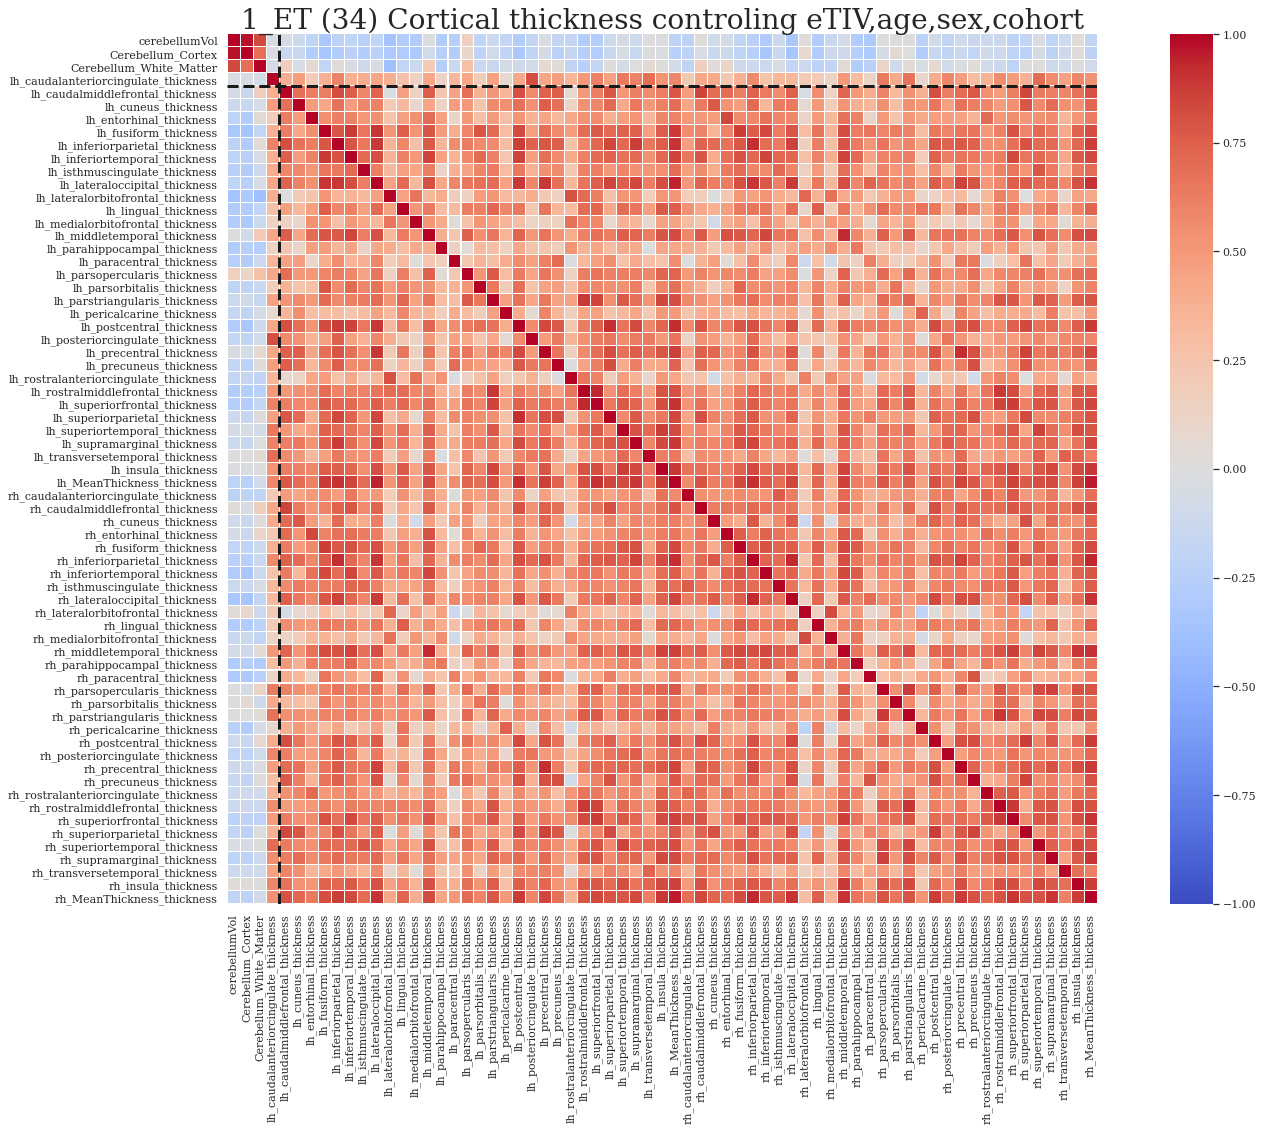

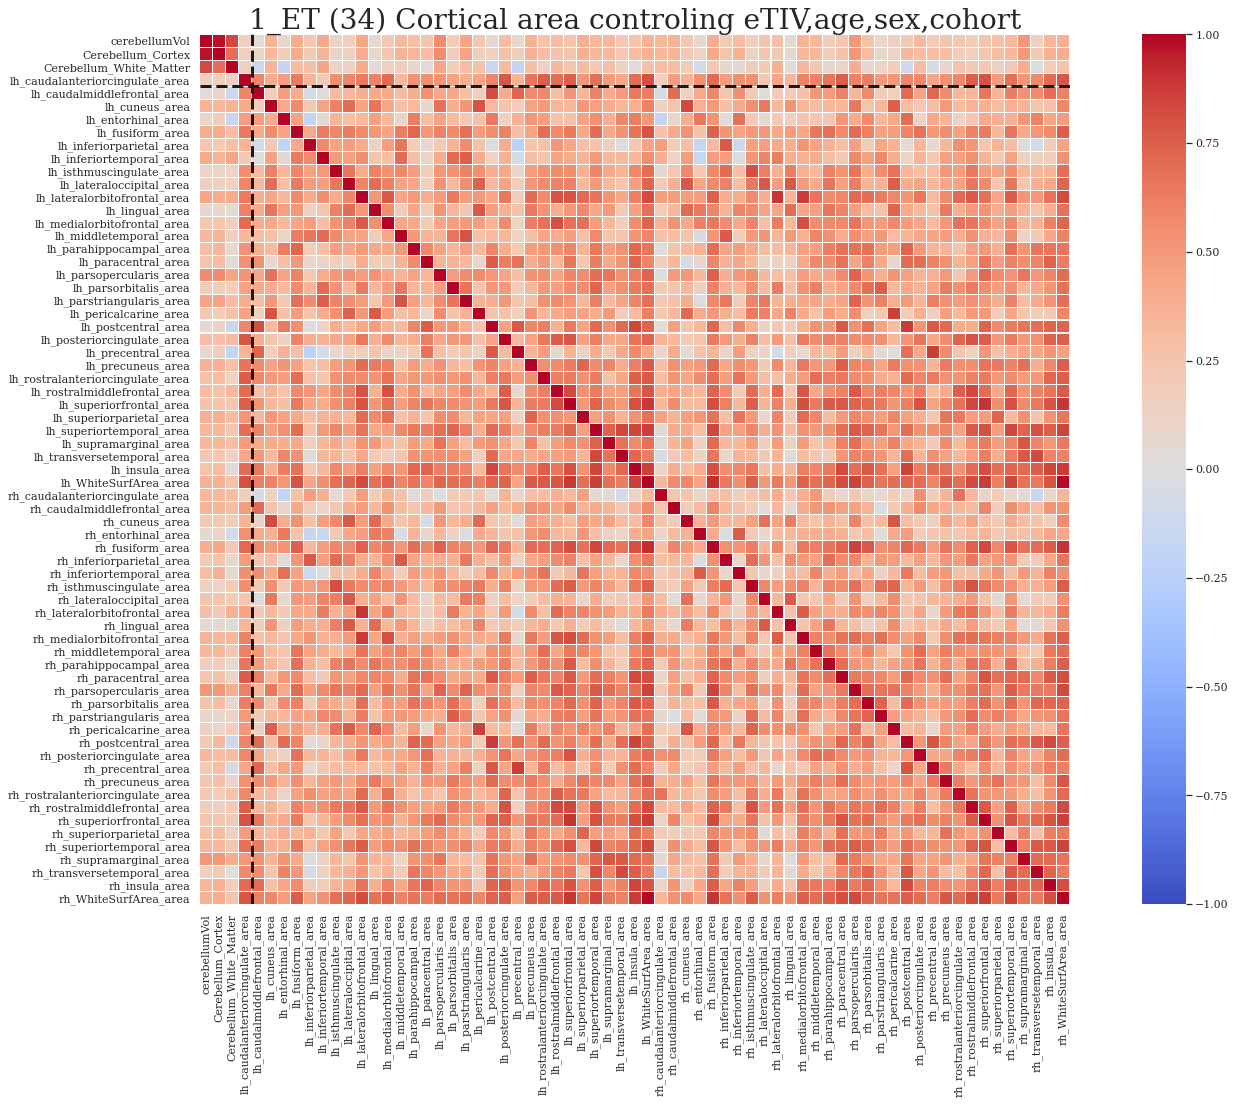

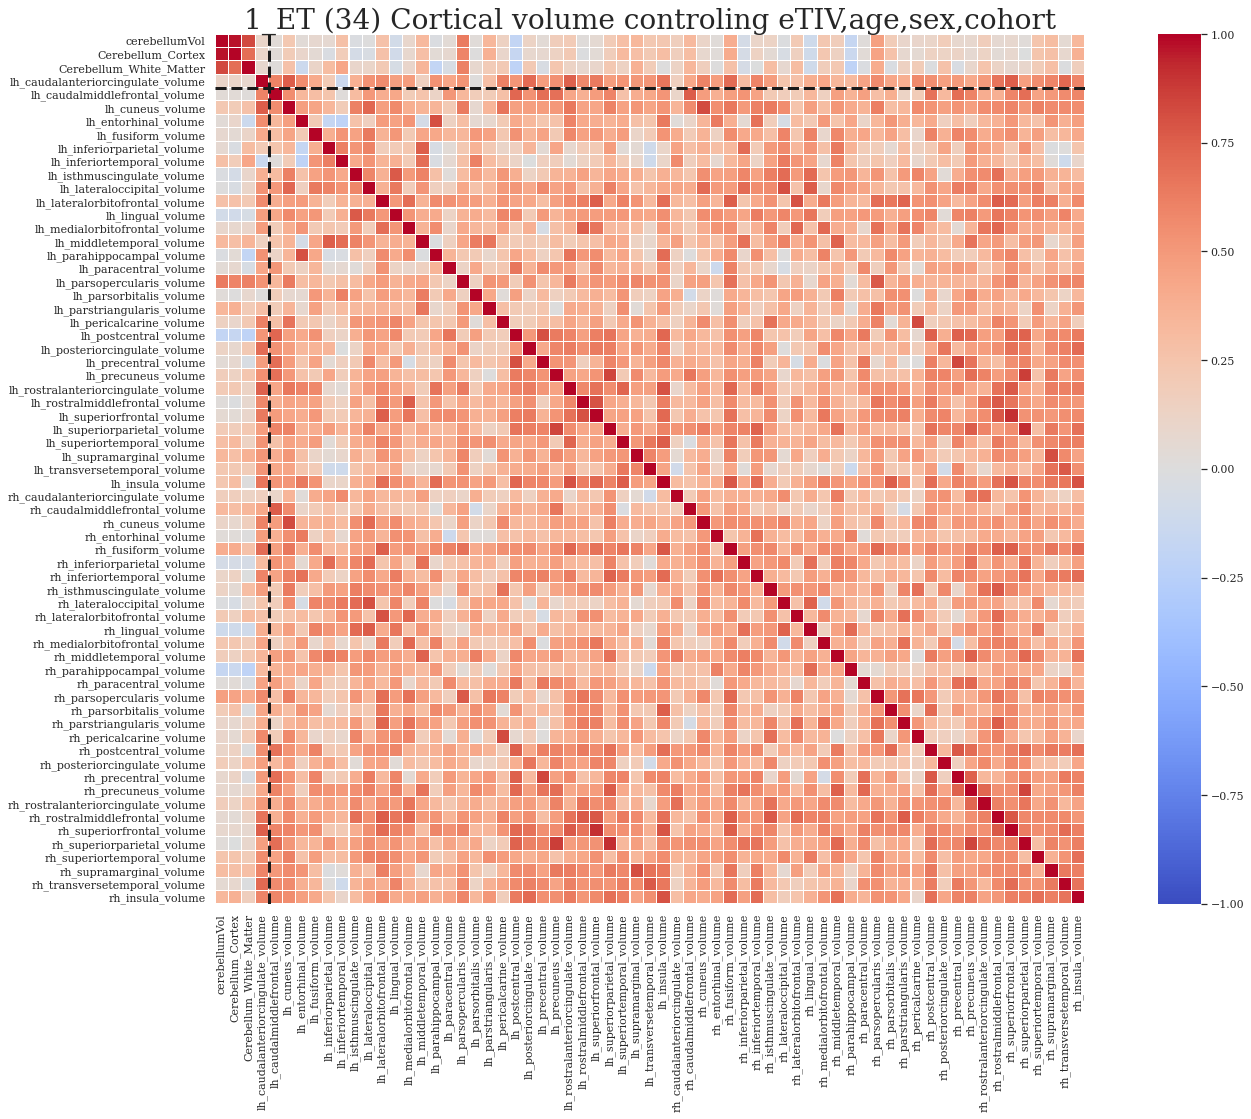

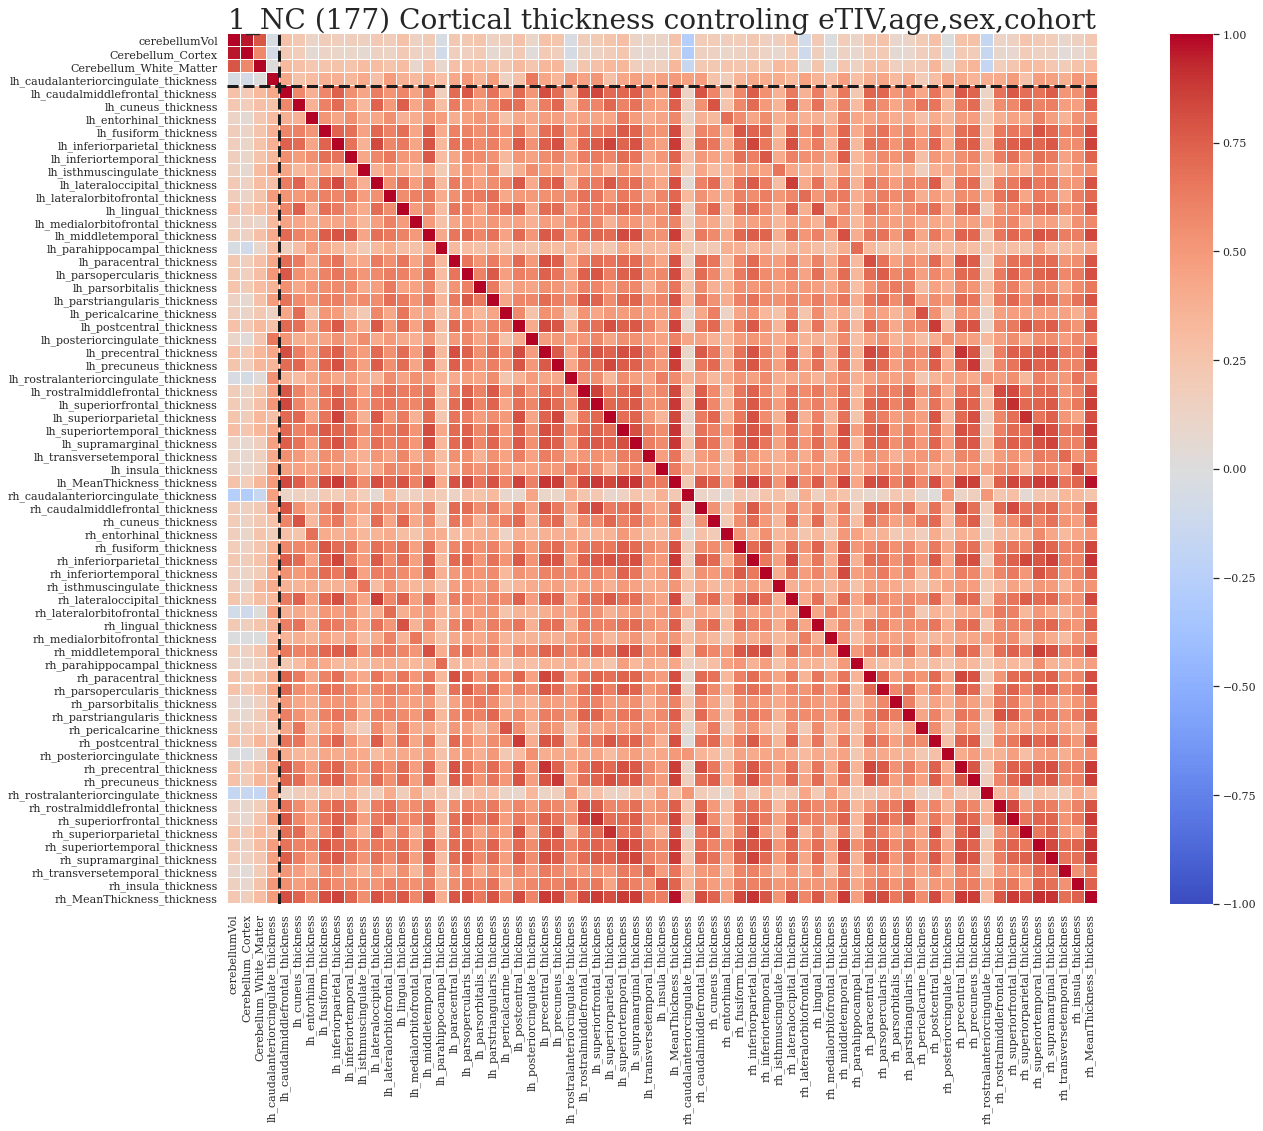

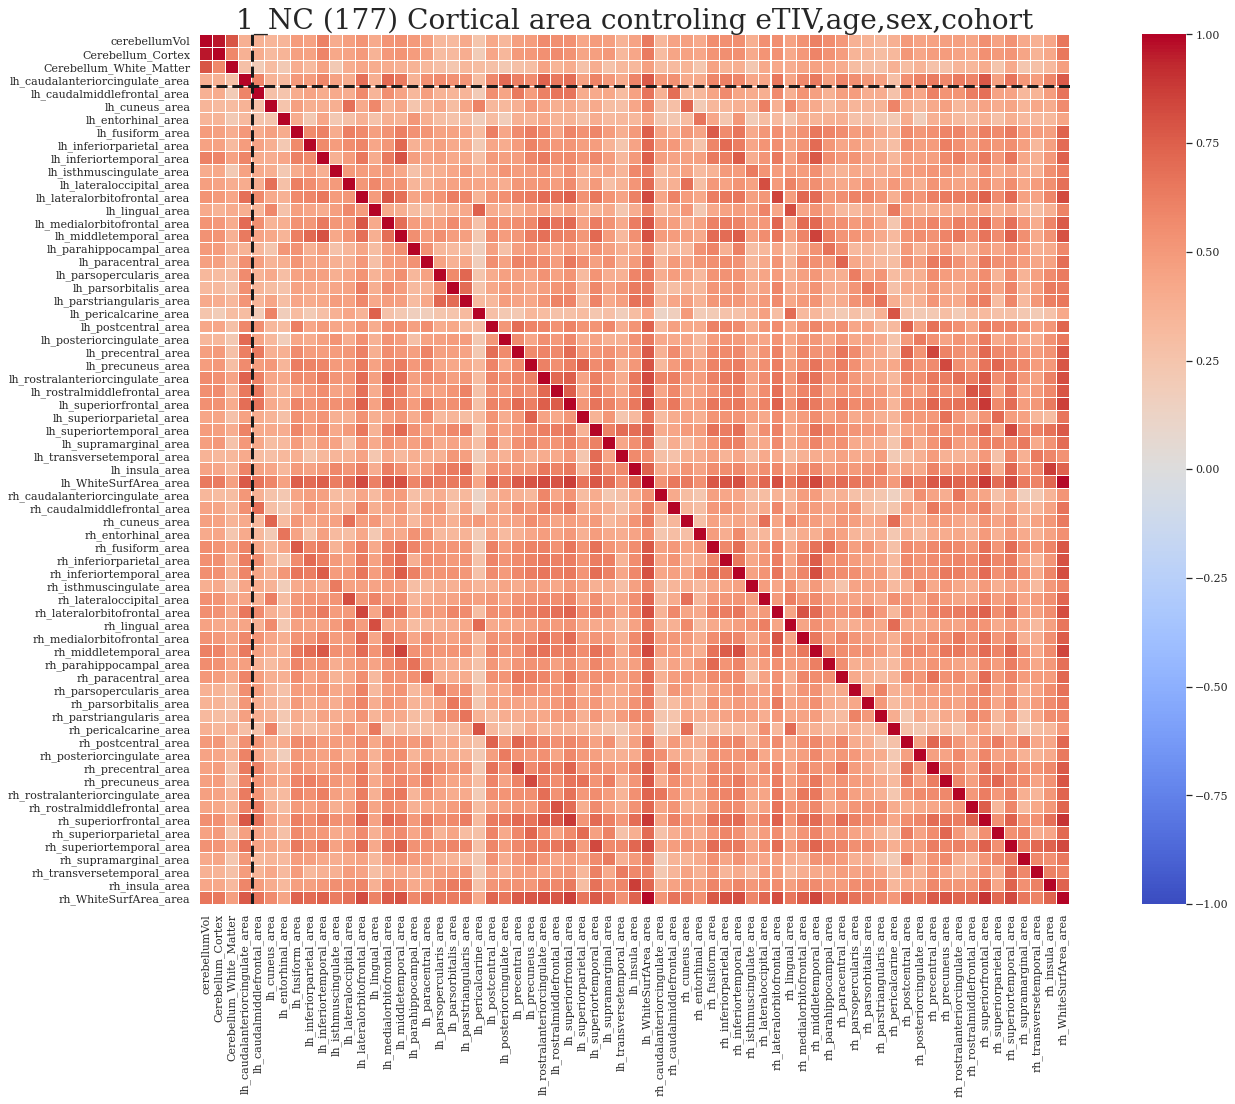

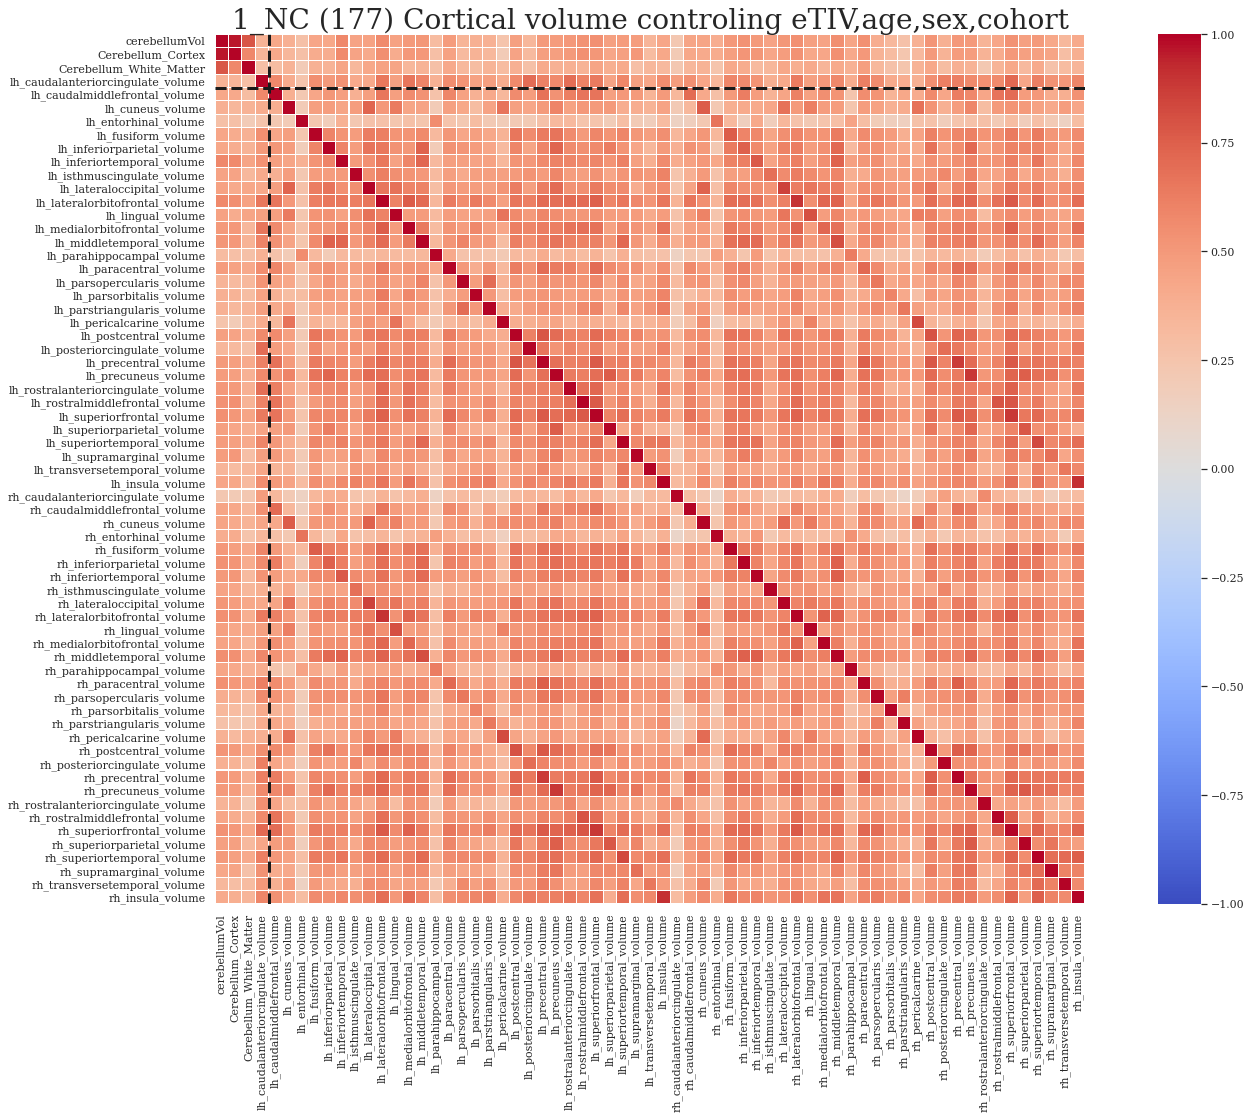

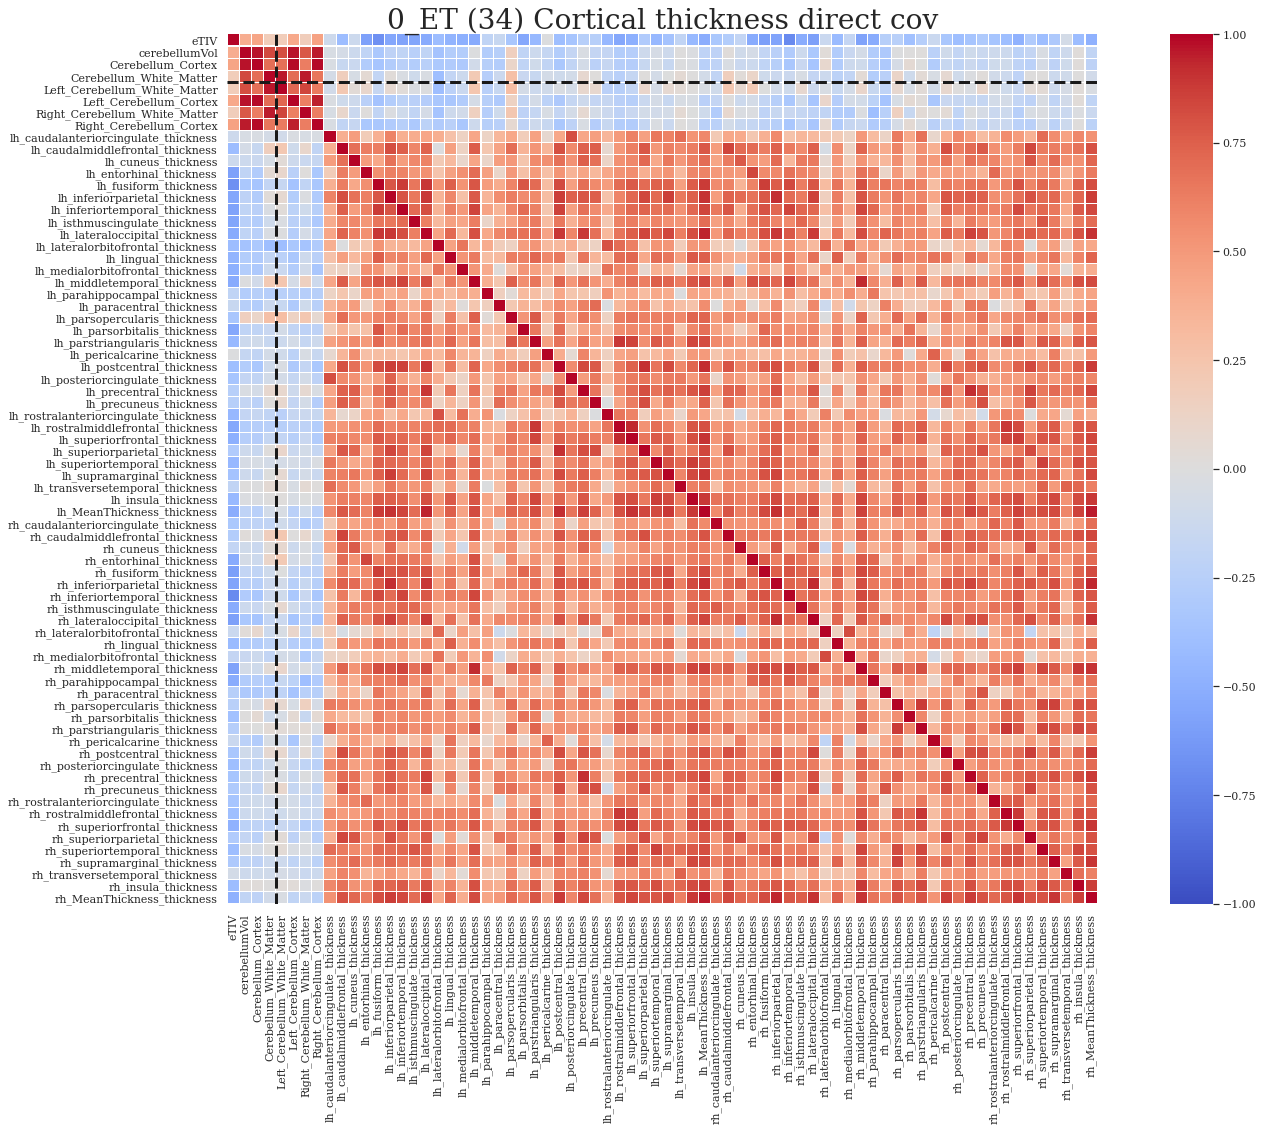

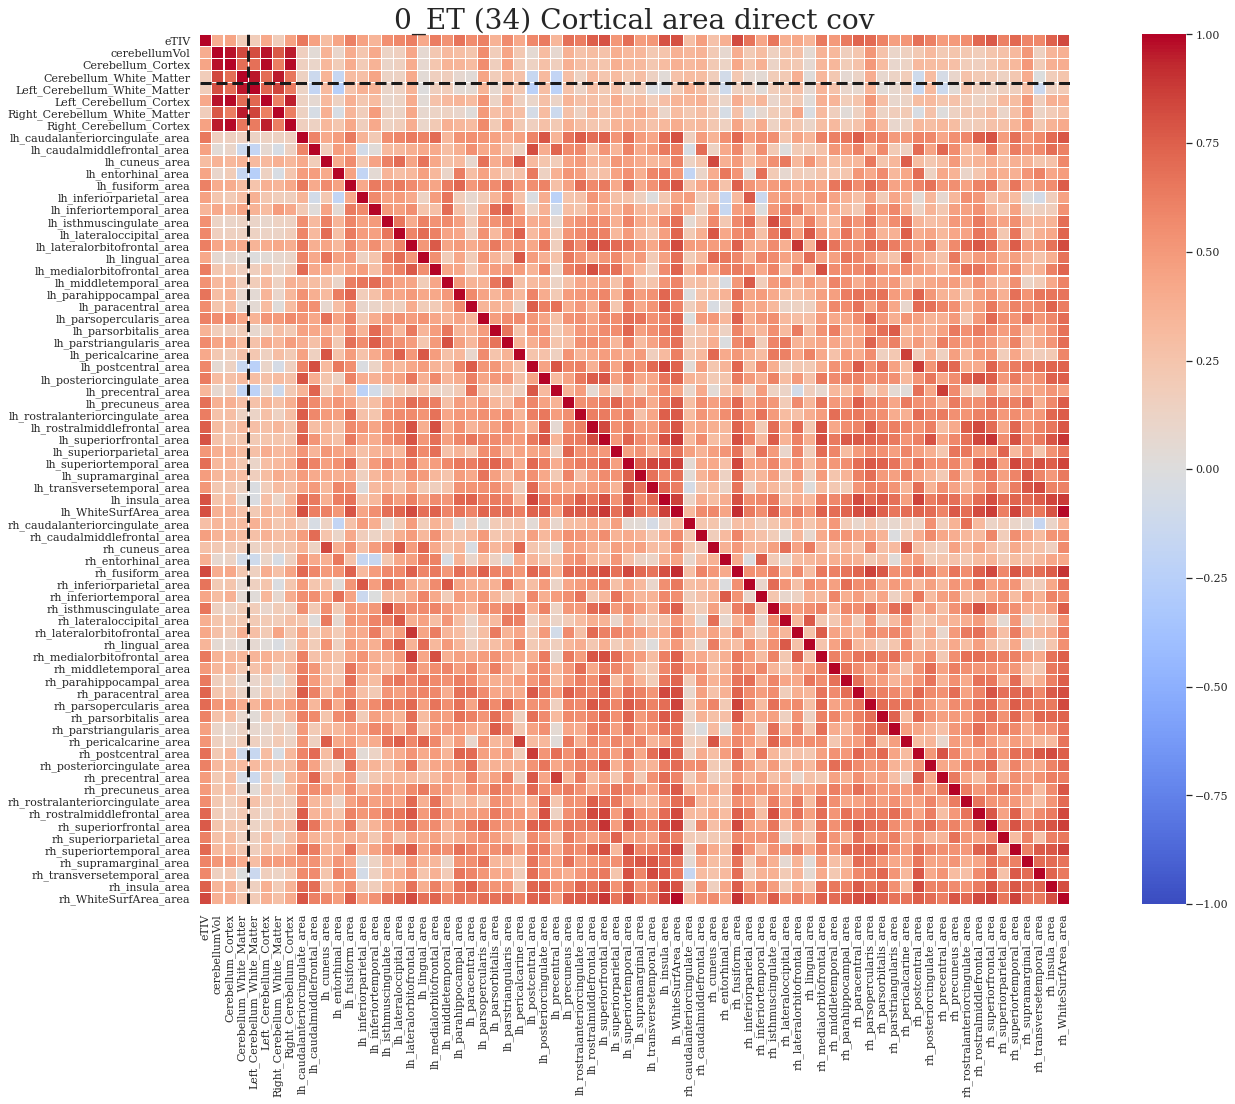

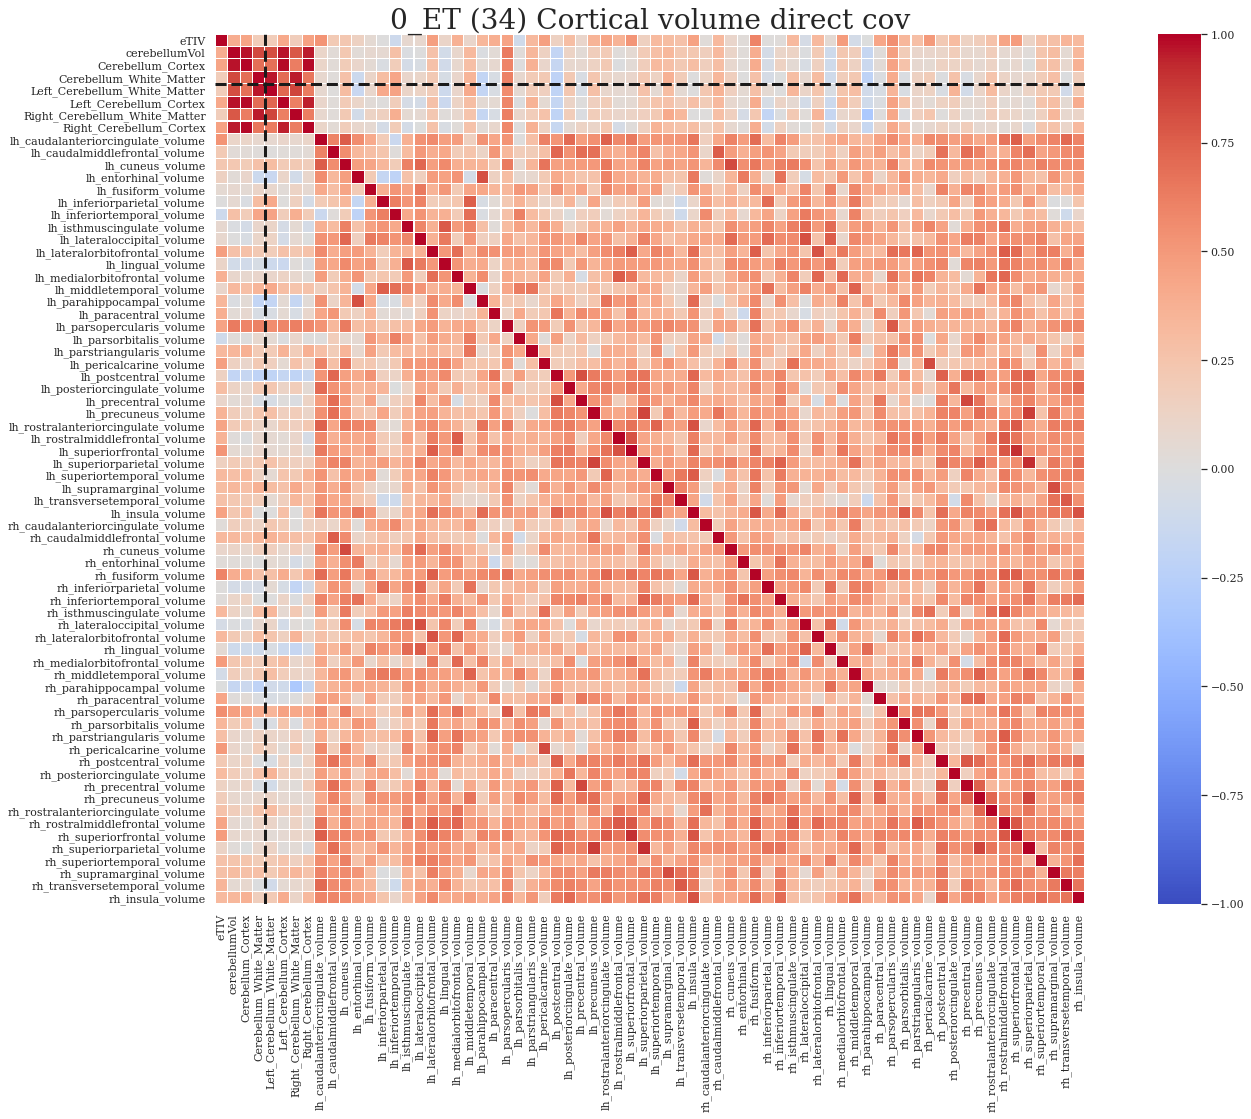

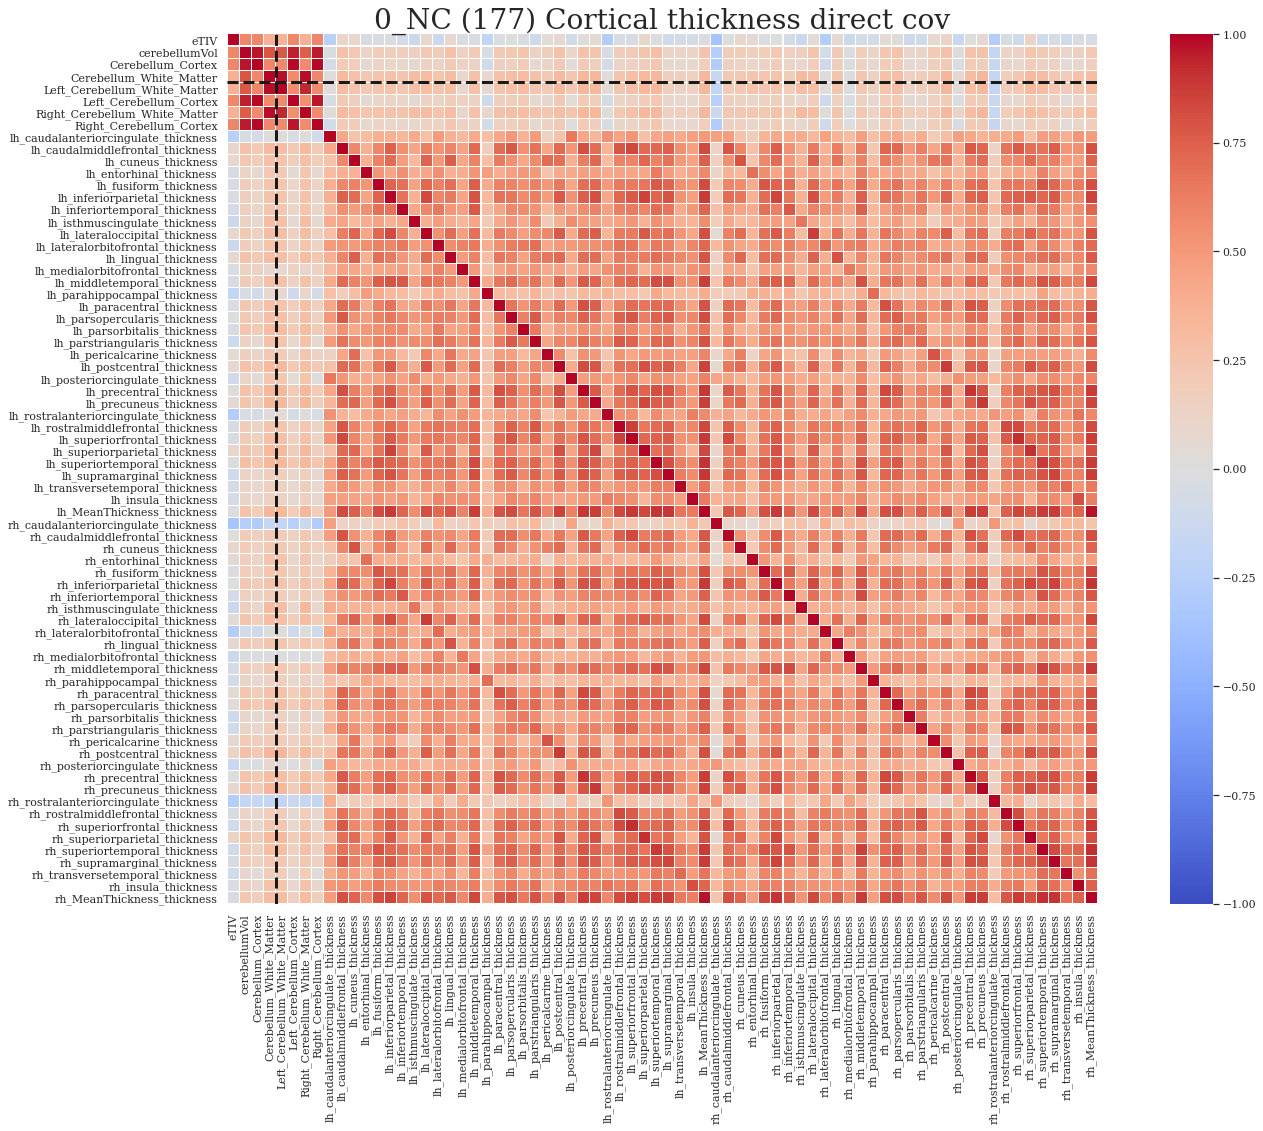

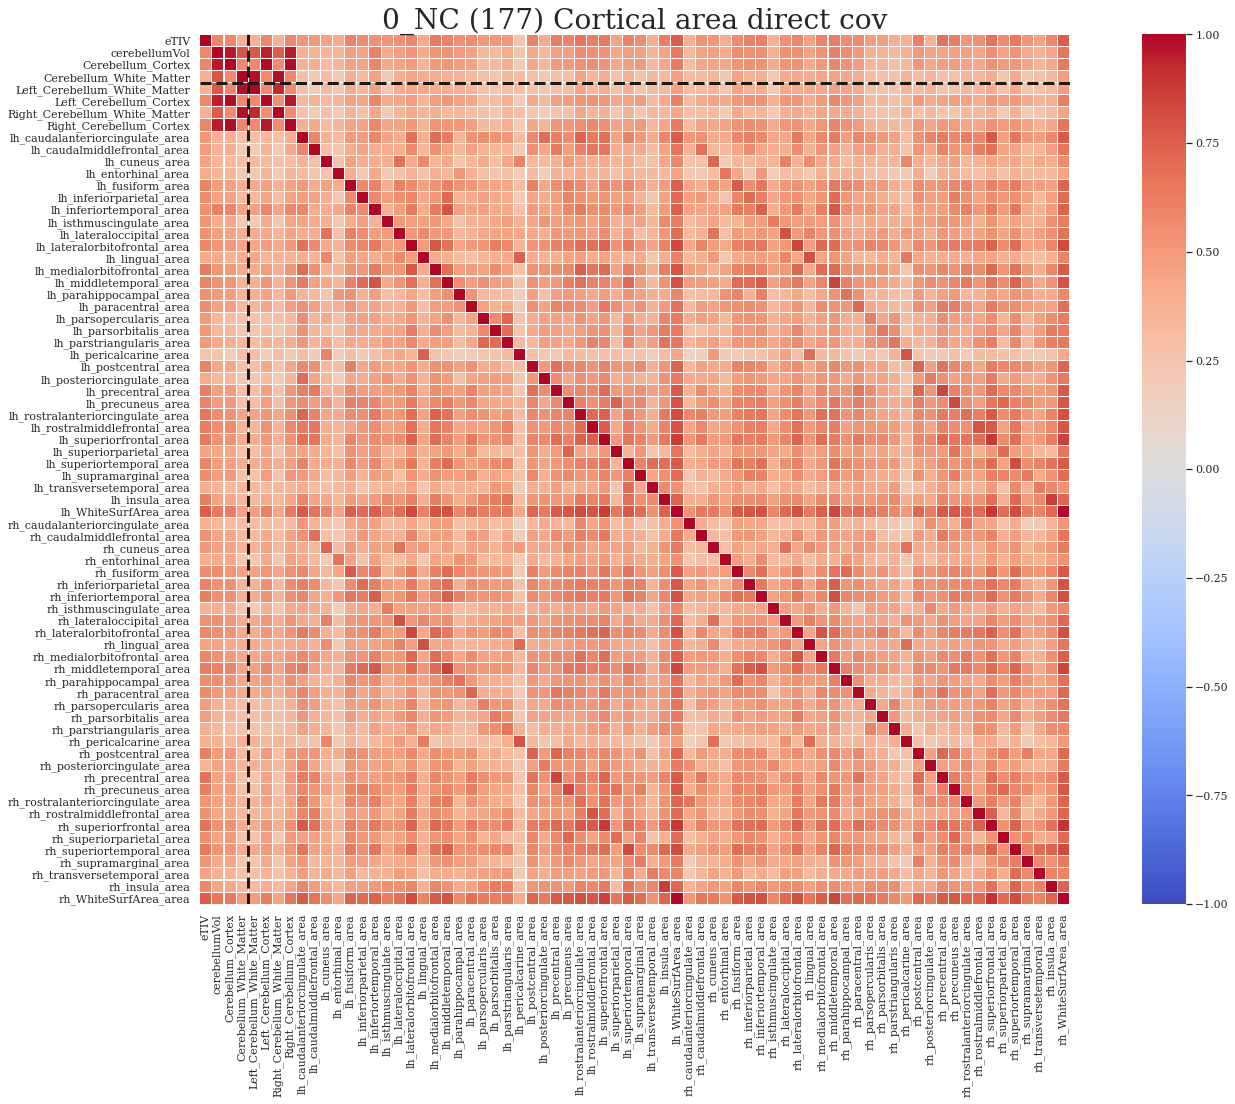

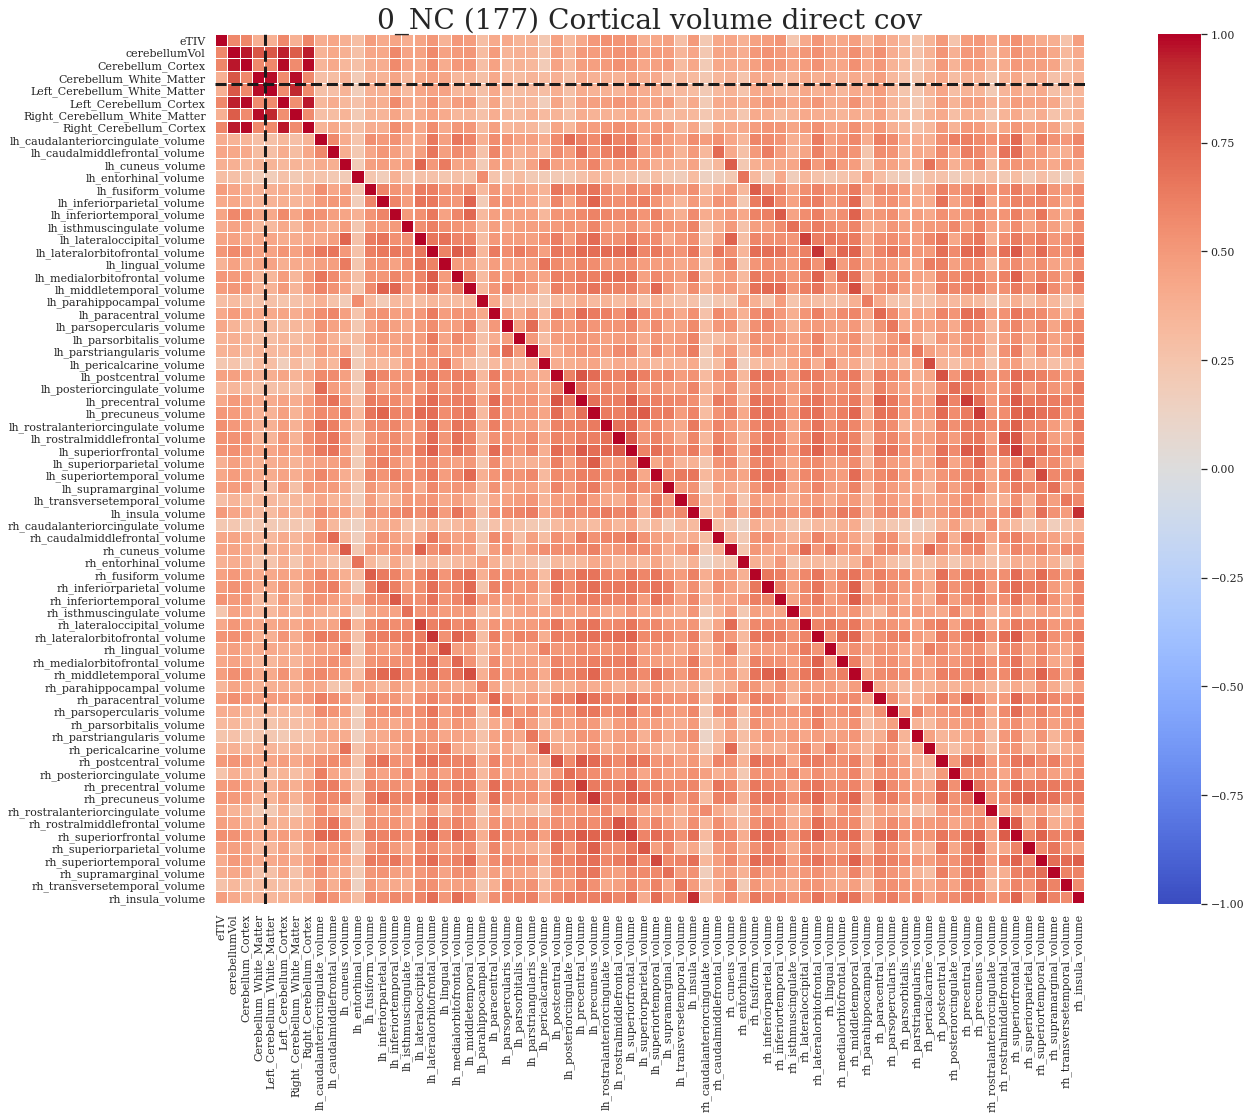

In [6]:
# Direct comparison of cortical thickness/cortical volumes/cortical area
# distribution plot for all the suit and maget
figure_size=(26, 16); 
FONT_SCALE=2.4;
legend_font_size=24
save_fig=1
C_MAP='coolwarm'; TH=0
# select data
vis_df=data_df.copy()
et_vis_df = vis_df[vis_df['group']=='ET'];
nc_vis_df = vis_df[vis_df['group']=='NC'];


et_cth_vis_df = et_vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_cth'] + DKT_list_dict['r_cth']].copy()
et_area_vis_df= et_vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_area']+DKT_list_dict['r_area']].copy()
et_vol_vis_df = et_vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_vol'] + DKT_list_dict['r_vol']].copy()
nc_cth_vis_df = nc_vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_cth'] + DKT_list_dict['r_cth']].copy()
nc_area_vis_df= nc_vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_area']+DKT_list_dict['r_area']].copy()
nc_vol_vis_df = nc_vis_df.loc[:,other_list+cerebellum_list+DKT_list_dict['l_vol'] + DKT_list_dict['r_vol']].copy()

# figure control
#f1 = plt.figure(figsize=figure_size, facecolor='w', edgecolor='lightgray')
#gs = f1.add_gridspec(1, 3)
#ax1 = f1.add_subplot(gs[0, 0])
#ax2 = f1.add_subplot(gs[0, 1])
#ax3 = f1.add_subplot(gs[0, 2])
def vis_corr_mat(df, title_str, sv_fig):
    print('Visualizing: ',title_str)
    # vis config
    f = plt.figure(figsize=figure_size, facecolor='w', edgecolor='lightgray')
    sns.set_theme(style="whitegrid", palette="pastel", font_scale=1)
    sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
    # data
    corr_=df.corr()
    mask_=corr_.where(np.abs(corr_)>TH, True).copy()
    mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
    #vis
    ax=sns.heatmap(corr_, annot=False, fmt=".2f", mask=mask_, #ax=ax_,
                   vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
    ax.set_title(title_str, fontsize=28)
    x=len(cerebellum_list);
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
    if save_fig: print('saving...'); f.savefig("0_strucCov_"+title_str+".jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)
    display(corr_)
# vis
vis_corr_mat(res_DKT['cth']['ET'], '1_ET (34) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(res_DKT['area']['ET'],'1_ET (34) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(res_DKT['vol']['ET'], '1_ET (34) Cortical volume controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(res_DKT['cth']['NC'], '1_NC (177) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(res_DKT['area']['NC'],'1_NC (177) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(res_DKT['vol']['NC'], '1_NC (177) Cortical volume controling eTIV,age,sex,cohort', save_fig)

vis_corr_mat(et_cth_vis_df, '0_ET (34) Cortical thickness direct cov', save_fig)
vis_corr_mat(et_area_vis_df,'0_ET (34) Cortical area direct cov', save_fig)
vis_corr_mat(et_vol_vis_df, '0_ET (34) Cortical volume direct cov', save_fig)
vis_corr_mat(nc_cth_vis_df, '0_NC (177) Cortical thickness direct cov', save_fig)
vis_corr_mat(nc_area_vis_df,'0_NC (177) Cortical area direct cov', save_fig)
vis_corr_mat(nc_vol_vis_df, '0_NC (177) Cortical volume direct cov', save_fig)
# save figures
#if save_fig: print('saving...'); f1.savefig("FigureX_matched-corhorts_methods-Sensitivity.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)# , dpi=300

In [ ]:
# Heatmap of full correlation between SUIT and MAGeT measures (Augmented NC)
# vis config
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

C_MAP='coolwarm'; TH=0.5
# select data
vis_df=data_df.copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:length_lobule_list]+SUIT_v_labels+SUIT_r_labels[:length_lobule_list]+MAGeT_l_labels+MAGeT_r_labels]
# data proc
corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (Augmented cohort)', fontsize=28)
line_pos=[length_lobule_list,length_lobule_list+len(SUIT_v_labels),length_lobule_list*2+len(SUIT_v_labels),length_lobule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("Augmented-Cohort_SUIT-MAGeT_comp.jpg")
display(corr_)

Text(0.5, 1.0, 'Mean cortical thickness between ET and NC (Augmented cohort, Destrieux 2009a Atlas)')

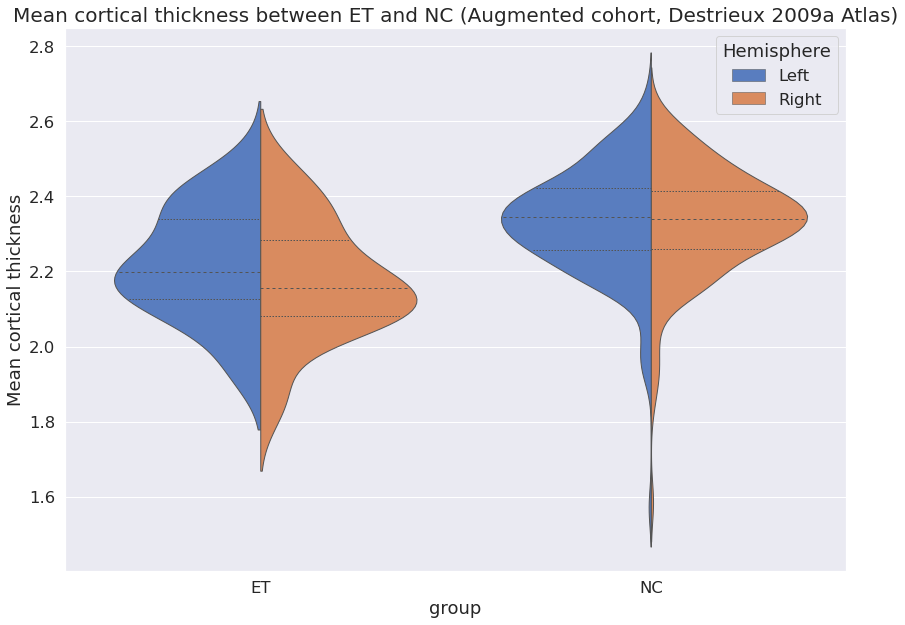

In [5]:
#Mean cortical thickness for left and right hemisphere
lr_mct_vis=data_df.copy()

l_mct=lr_mct_vis[['group','cohort','lh_MeanThickness_thickness']].copy(); 
l_mct.loc[:,'Hemisphere']='Left'; 
l_mct.loc[:,'Mean cortical thickness']=l_mct.loc[:,'lh_MeanThickness_thickness'];
#l_mct=l_mct.drop(columns=['left_mean_cortical_thickness'])

r_mct=lr_mct_vis[['group','cohort','rh_MeanThickness_thickness']].copy(); 
r_mct.loc[:,'Hemisphere']='Right'; 
r_mct.loc[:,'Mean cortical thickness']=r_mct.loc[:,'rh_MeanThickness_thickness'];
#r_mct=r_mct.drop(columns=['rh_MeanThickness_thickness'])

vis_df=pd.concat([r_mct, l_mct])
vis_df=vis_df.sort_values(by=['Hemisphere'], ascending=1)

vis_mni_df=vis_df.copy()
vis_mni_df=vis_mni_df[vis_mni_df['cohort']=='MNI'];
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots(figsize=(14, 10))
sns.violinplot(data=vis_df, x="group", y="Mean cortical thickness", hue="Hemisphere", order=['ET','NC'],split=True, inner="quartile", linewidth=1, palette="muted", ax=ax)
#sns.despine(left=True)
ax.set_title('Mean cortical thickness between ET and NC (Augmented cohort, Destrieux 2009a Atlas)', fontsize=20)
#fig.savefig("AugCohort_SUIT-MAGeT_comp.jpg")